In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import seaborn as sns
sns.set_theme(font_scale=1.5, style = 'whitegrid', context= 'notebook')
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

my_cmap = LinearSegmentedColormap.from_list('my_cmap', ["#00000000", "#3f37c9", "#c44536"], N = 100)
my_cmap
#oadeji01
os.chdir('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi')#\\20250616')#\\20250609_fitted\\fitted1

In [40]:
glass = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\20241206\\20241206.csv')
g_mean = glass[glass['sample'] == 'GlassSlide'].iloc[:, 5:].mean()
norm_g = (g_mean.values/np.max(g_mean.values))*1000

## Import and process raw data (text file)

In [28]:
files = []
for file in os.listdir():
    #print(file)
    if file.endswith('.txt'):#and 'p' in file: 
        #print(file)
        with open(file, 'r') as txt_files:

            #print(txt_files)
            files.append(txt_files.read().split(' '))

In [22]:
col_names = [f[-1].split()[1:][::2] for f in files][0]
row_names = [f.split('.')[0] for f in os.listdir() if f.endswith('.txt')]
#[f[40].splitlines()[4].split('\t')[1] for f in files]
df = pd.DataFrame([f[-1].split()[1:][1::2] for f in files], columns=col_names).astype('float')
df.insert(0, 'sample', row_names)
#df['sample'] = df['sample'] + '_Parallel'
#df.head()

In [24]:
df.to_csv('glass_spec.csv', index = False)

In [19]:
#df = pd.concat(data, ignore_index=True)
#df['sample'] = df['sample'].str.replace("0_", "0.", regex = False)
deets = df['sample'].str.split('_', expand = True).rename(columns= {0:'sample', 1: 'trt_time', 2: 'orient', 3: 'spectra_num'})
deets1 = deets.fillna('Control')
df = pd.concat([deets1, df.iloc[:, 1:]], axis=1)
#df.insert(3, 'pre/post', np.where(df['Trt'].str.contains('post'), 'post', 'pre'))'''
df.head()

sample trt_time orient spectra_num  752.901  754.044  755.187  756.329  \
0   Ctrl   20mins   Orth          01  1270.88  1273.33  1275.65  1280.17   
1   Ctrl   20mins   Orth          02  1106.98  1118.51  1129.13  1137.44   
2   Ctrl   20mins   Orth          03  1276.07  1287.05  1295.43  1304.52   
3   Ctrl   20mins   Orth          04  1291.23  1297.60  1295.64  1293.20   
4   Ctrl   20mins   Orth          05  1396.85  1408.78  1418.47  1427.27   

   757.471  758.613  ...  1769.07  1769.94   1770.8  1771.67  1772.54  \
0  1288.71  1294.67  ...  565.105  562.740  560.354  558.845  558.521   
1  1143.45  1146.64  ...  470.222  469.544  468.722  467.531  466.032   
2  1313.22  1319.89  ...  440.796  441.198  440.752  439.578  438.327   
3  1290.31  1286.80  ...  463.253  463.006  462.891  462.865  462.397   
4  1435.55  1442.71  ...  476.904  475.514  473.959  471.897  469.546   

    1773.4  1774.27  1775.13     1776  1776.86  
0  559.629  562.412  567.205  572.911  579.829  
1  464.309  462.369  460.207  457.777  455.084  
2  437.654  437.061  437.124  436.352  436.645  
3  463.548  465.017  463.723  462.963  460.611  
4  467.540  467.617  467.804  466.517  468.296  

[5 rows x 1028 columns]

### Save processed data

In [16]:
df.to_csv('20250616.csv')

In [22]:
df.groupby(['sample', 'trt_time', 'orient']).mean().reset_index().to_csv('20250609_mean.csv')

### Import .csv files for analyses

In [59]:
df1 = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\20250410\\20250410.csv')
df2 = pd.read_csv('20250408.csv')

In [843]:
#df = pd.concat([df2, df1], axis=0, ignore_index = True)
df = pd.read_csv('20250429.csv')
df2 = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\20250501\\20250501.csv')
df2.columns =  df.columns

In [844]:
df = pd.concat([df, df2], axis=0).reset_index(drop=True)

In [ ]:
df[(df['orient'] == 'Para') & ]

sample trt_time orient   753.561   754.704   755.847    756.99   758.132  \
6     Ctrl   20mins   Para   2.85144   2.42676   6.98914   5.76331   7.01379   
7     Ctrl   20mins   Para   7.28503  16.97000  21.82590  33.87050  48.71850   
8     Ctrl   20mins   Para   3.28796   4.62598   9.02832  11.70340  14.32030   
9     Ctrl   20mins   Para   4.71643  10.40580  18.22030  23.00600  28.09170   
10    Ctrl   20mins   Para   2.22449   5.99768   8.49402   8.89563   9.90735   
..     ...      ...    ...       ...       ...       ...       ...       ...   
248    Trt   60mins   Para  14.81270   7.86572   4.77466   8.62817  14.67720   
249    Trt   60mins   Para   9.95410   7.66650   7.28687  11.59350  16.44170   
250    Trt   60mins   Para   7.73389   7.74988   9.63879  13.53660  17.61910   
251    Trt   60mins   Para  11.55930  11.22920  14.00440  16.95830  19.06980   
252    Trt   60mins   Para  36.73340  24.31180  19.74100  17.32710  15.52560   

      759.274  760.416  ...    1770.1   1770.96   1771.83    1772.7   1773.57  \
6     8.95459  11.0745  ...  10.44410  11.48730  12.53030  14.11300  16.64760   
7    56.33030  59.5973  ...   4.70773   4.40268   4.47421   5.48190   5.74838   
8    17.15140  21.8141  ...   2.79684   3.39926   4.06790   4.91803   5.85672   
9    33.11730  35.8074  ...   5.71848   4.99881   2.93973   1.95053   3.20819   
10   11.48730  12.8020  ...   2.43411   2.87079   3.43292   4.18127   5.04733   
..        ...      ...  ...       ...       ...       ...       ...       ...   
248  20.73120  25.0491  ...  10.60850  10.89250  13.25050  15.96320  18.50900   
249  22.30860  26.1697  ...  13.52210  14.57520  15.63790  16.58250  17.48640   
250  21.46370  24.9944  ...  16.63180  16.47310  15.98210  15.12840  13.97620   
251  21.37540  23.7646  ...   8.96625  11.04630  13.68130  16.74310  20.11390   
252  15.36790  16.7888  ...   6.77966   6.23944   5.48621   4.74011   4.20166   

      1774.43    1775.3   1776.16   1777.03    1777.9  
6    19.78670  23.18300  26.61090  18.27200   3.91592  
7     6.27182   6.89917   8.47687  12.25610  12.29220  
8     7.11157   8.49802  10.06520   9.79181  11.54910  
9     2.83954   2.61041   2.52118   2.57147   5.16168  
10    6.04147   7.02249   8.42343  10.05330  12.99300  
..        ...       ...       ...       ...       ...  
248  22.08970  27.84870  35.34110  48.36150  59.62530  
249  17.96170  18.25040  18.59300  18.89390  19.09390  
250  12.47610  10.74630   8.61615   6.06036   2.86456  
251  23.79350  26.53460  29.75180  32.81600  35.93550  
252   4.12927   5.04645   5.79413   3.72253  -2.47314  

[123 rows x 1027 columns]

In [719]:
df.columns[600:700]

Index(['1385.4', '1386.37', '1387.35', '1388.33', '1389.3', '1390.28',
       '1391.25', '1392.23', '1393.2', '1394.18', '1395.15', '1396.12',
       '1397.1', '1398.07', '1399.04', '1400.02', '1400.99', '1401.96',
       '1402.93', '1403.91', '1404.88', '1405.85', '1406.82', '1407.79',
       '1408.76', '1409.73', '1410.7', '1411.67', '1412.64', '1413.61',
       '1414.58', '1415.55', '1416.51', '1417.48', '1418.45', '1419.42',
       '1420.38', '1421.35', '1422.32', '1423.29', '1424.25', '1425.22',
       '1426.18', '1427.15', '1428.11', '1429.08', '1430.04', '1431.01',
       '1431.97', '1432.93', '1433.9', '1434.86', '1435.82', '1436.79',
       '1437.75', '1438.71', '1439.67', '1440.63', '1441.6', '1442.56',
       '1443.52', '1444.48', '1445.44', '1446.4', '1447.36', '1448.32',
       '1449.28', '1450.24', '1451.19', '1452.15', '1453.11', '1454.07',
       '1455.03', '1455.98', '1456.94', '1457.9', '1458.85', '1459.81',
       '1460.77', '1461.72', '1462.68', '1463.63', '1464.59'

In [26]:
# Normalize data to a specific wavelength1455.0341
norm = df.iloc[:, 3:].div(df['1455.6'], axis=0)#dt.iloc[:, 5:].sum(axis=1)
dt_norm = pd.concat([df.iloc[:, :3], norm], axis=1)
dt_norm = dt_norm.drop(dt_norm.index[113:119])
#dt_norm

In [407]:
dt_norm.index[108:118]

RangeIndex(start=108, stop=118, step=1)

In [525]:
dt_norm[(dt_norm['940.5'] > 1.2) & (dt_norm['sample'] == 'Trt') & (dt_norm['orient'] == 'Para')]

sample trt_time orient   753.561   754.704   755.847    756.99   758.132  \
78     Trt   20mins   Para  0.034972  0.038689  0.039090  0.037542  0.030598   
136    Trt   40mins   Para  0.003814  0.010417  0.023031  0.034524  0.042631   

      759.274   760.416  ...    1770.1   1770.96   1771.83    1772.7  \
78   0.024993  0.030146  ...  0.022777  0.033149  0.045599  0.059923   
136  0.041408  0.041477  ...  0.025553  0.023204  0.021146  0.019831   

      1773.57   1774.43    1775.3   1776.16   1777.03    1777.9  
78   0.075360  0.089411  0.103001  0.116711  0.129266  0.134847  
136  0.020092  0.024075  0.038572  0.055537  0.090107  0.141572  

[2 rows x 1027 columns]

### Subtract Riboflavin signal from the treatments

In [847]:
df_mean = dt_norm.groupby(['sample', 'trt_time', 'orient']).mean().reset_index()
df_mean.head()

sample trt_time orient   753.117    754.26   755.404   756.546   757.688  \
0   Ctrl   20mins   Orth  0.010322  0.044820  0.078675  0.105227  0.127254   
1   Ctrl   20mins   Para  0.021344  0.046055  0.080485  0.112206  0.130549   
2   Ctrl      24h   Orth  0.014305  0.037298  0.061619  0.079512  0.094744   
3   Ctrl      24h   Para  0.029362  0.061669  0.087716  0.101141  0.106186   
4   Ctrl    2mins   Orth  0.009752  0.034773  0.056194  0.077154  0.095255   

    758.831   759.973  ...   1769.74   1770.61   1771.48   1772.35   1773.21  \
0  0.144671  0.159971  ...  0.029991  0.032522  0.035178  0.038345  0.040308   
1  0.144325  0.149216  ...  0.045643  0.045272  0.044598  0.044606  0.045366   
2  0.112290  0.126544  ...  0.036546  0.036874  0.038211  0.040761  0.043359   
3  0.111361  0.115645  ...  0.027454  0.029509  0.033451  0.035318  0.036484   
4  0.110880  0.125561  ...  0.023564  0.021959  0.021057  0.022171  0.026743   

    1774.08   1774.95   1775.81   1776.68   1777.54  
0  0.042594  0.043994  0.045010  0.044151  0.044900  
1  0.047411  0.051530  0.055782  0.060956  0.068542  
2  0.047485  0.048452  0.051707  0.055437  0.058121  
3  0.038529  0.040676  0.045621  0.051978  0.057422  
4  0.032385  0.041707  0.052027  0.053177  0.058293  

[5 rows x 1027 columns]

In [ ]:
df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time']==x)].iloc[1, 3:]-df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time']==x)].iloc[0, 3:]

In [27]:
# Difference of Treated and Final Treated
df_mean = dt_norm.groupby(['sample', 'trt_time', 'orient']).mean().reset_index()

diff = []
diff_final = []
for orient in ['Para', 'Orth']:
    for x in ['2mins','20mins','40mins', '60mins', '24h']:#
        dif = df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time']==x)].iloc[1, 3:]-df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time']==x)].iloc[0, 3:]
        #dif_24h = df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time'].isin([x, f'{x}24h']))].iloc[2, 3:]-df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time'].isin([x, f'{x}24h']))].iloc[0, 3:]
        diff.append({'trt_time': x, 'orient': orient, 'd': dif.values})
        #diff_final.append({'trt_time': x, 'orient': orient, 'd': dif_24h.values})


diff_df = pd.DataFrame(diff)
#diff_dff = pd.DataFrame(diff_final)

df_diff = pd.concat([diff_df.iloc[:, :2], diff_df['d'].apply(pd.Series)], axis = 1)
#dff_diff = pd.concat([diff_dff.iloc[:, :2], diff_dff['d'].apply(pd.Series)], axis = 1)

df_diff.columns = ['trt_time','orient'] + df_mean.iloc[:, 3:].columns.tolist()
#dff_diff.columns = ['trt_time','orient'] + df_mean.iloc[:, 3:].columns.tolist()

df_diff.insert(0, 'sample', ['diff']*len(df_diff))
#dff_diff.insert(0, 'sample', ['diff_final']*len(df_diff))
#pd.DataFrame(diff)

sub_dff =pd.concat([df_diff, dff_diff])
sub_dff.head()

NameError: name 'dff_diff' is not defined

In [856]:
aucc = []
for x in range(0, sub_dff.shape[0]):
    aucc.append(np.trapezoid(sub_dff.iloc[x, 440:500], x = [np.float64(x) for x in sub_dff.iloc[:, 440:500].columns]))

In [858]:
diff_test = pd.concat([sub_dff.iloc[:, :3].reset_index(drop=True), pd.DataFrame(aucc, columns=['auc'])], axis=1)
#pd.concat([pd.DataFrame(diff).iloc[:, :2], pd.DataFrame(pd.DataFrame(diff)['d'].to_list(), columns = dt_norm.iloc[:, 3:].columns).sum(axis=1)], axis=1)
diff_test.head()

sample trt_time orient       auc
0   diff    2mins   Para -1.369601
1   diff   20mins   Para -0.883626
2   diff   40mins   Para  0.978820
3   diff   60mins   Para  0.403518
4   diff      24h   Para -5.118977

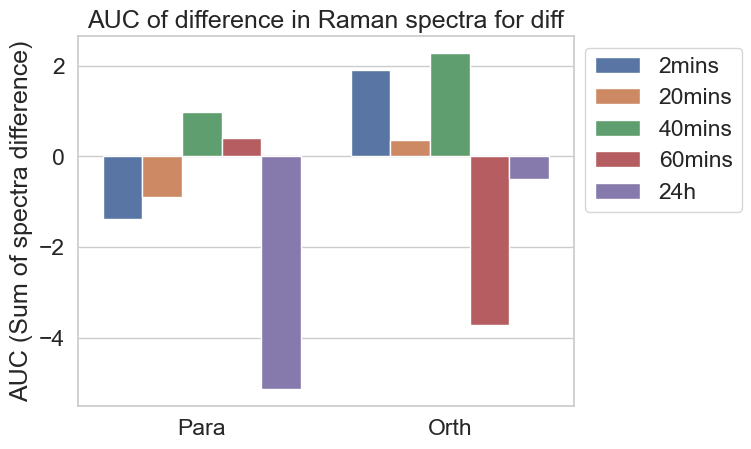

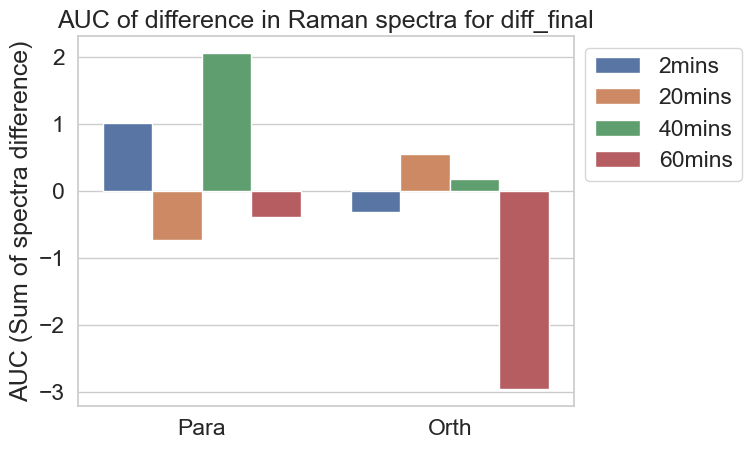

In [859]:
for x in ['diff', 'diff_final']:
    plt.figure()
    sns.barplot(
        x = 'orient',
        y = 'auc',
        data = diff_test[diff_test['sample'] == x],
        hue = 'trt_time',
    )
    plt.title(f'AUC of difference in Raman spectra for {x}')
    plt.ylabel('AUC (Sum of spectra difference)')
    plt.xlabel('')
    plt.legend(bbox_to_anchor = (1,1))

In [648]:
#Standard Difference data

df_mean = dt_norm.groupby(['sample', 'trt_time', 'orient']).mean().reset_index()

diff = []
for orient in ['Para', 'Orth']:
    for x in ['2mins','20mins','40mins', '60mins']:#, '24h'
        dif = df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time'] == x)].iloc[1, 3:]-df_mean[(df_mean['orient'] == orient) & (df_mean['trt_time'] == x)].iloc[0, 3:]
        diff.append({'trt_time': x, 'orient': orient, 'd': dif.values})


diff_df = pd.DataFrame(diff)
df_diff = pd.concat([diff_df.iloc[:, :2], diff_df['d'].apply(pd.Series)], axis = 1)
df_diff.columns = ['trt_time','orient'] + df_mean.iloc[:, 3:].columns.tolist()
df_diff.insert(0, 'sample', ['diff']*len(df_diff))
df_diff.head()

sample trt_time orient   753.561   754.704   755.847    756.99   758.132  \
0   diff    2mins   Para  0.010693  0.007218  0.017744  0.044508  0.051717   
1   diff   20mins   Para  0.031582  0.003580 -0.015371 -0.019690 -0.031528   
2   diff   40mins   Para  0.007616 -0.018552 -0.025981 -0.031651 -0.044112   
3   diff   60mins   Para  0.001460  0.017165  0.025932  0.025024  0.018637   
4   diff    2mins   Orth  0.000143  0.003375  0.004684  0.000215  0.003000   

    759.274   760.416  ...    1770.1   1770.96   1771.83    1772.7   1773.57  \
0  0.057875  0.058616  ...  0.006643  0.005981  0.006020  0.006874  0.008164   
1 -0.044734 -0.052291  ...  0.014580  0.013641  0.015005  0.014068  0.011452   
2 -0.036372 -0.025012  ... -0.008277 -0.014254 -0.020154 -0.024937 -0.028169   
3  0.012130  0.009435  ... -0.001103  0.004410  0.014927  0.023095  0.033076   
4 -0.000987 -0.002711  ...  0.013166  0.013695  0.013819  0.013573  0.012929   

    1774.43    1775.3   1776.16   1777.03    1777.9  
0  0.010978  0.014164  0.019773  0.026544  0.036696  
1  0.008971  0.004278  0.003374  0.007315  0.017539  
2 -0.028914 -0.037146 -0.050206 -0.060754 -0.024110  
3  0.045949  0.055766  0.063980  0.071146  0.077556  
4  0.012352  0.010023  0.006239  0.001867 -0.008285  

[5 rows x 1027 columns]

In [649]:
df_diff = pd.concat([dt_norm, sub_dff], axis=0)
df_sam = df_diff.melt(id_vars=['sample', 'trt_time', 'orient'])#.drop(['sample'], axis=1)
#[dt['sample'] == 'Micetail_Ribo0.5_pre']
df_sam[["variable", "value"]] = df_sam[["variable", "value"]].astype('float64')
df_sam.head()

sample trt_time orient  variable     value
0   Ctrl   20mins   Orth   753.561  0.001015
1   Ctrl   20mins   Orth   753.561  0.009672
2   Ctrl   20mins   Orth   753.561  0.014440
3   Ctrl   20mins   Orth   753.561  0.012903
4   Ctrl   20mins   Orth   753.561  0.021190

In [83]:
# Plot to show peak intensity at specified wavelengths between the control and treated samples.

for col in [734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95]:
    plt.figure(figsize = (6, 4));
    sns.boxplot(
        data = df_sam[(df_sam['variable'] == col)], #& (df_sam['value'] > -5)
        #([734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95])],
        x = 'sample',
        y = 'value',
        hue = 'Trt',
        #hue_order=['pbs','rf', '2mins', '7mins','12mins', '17mins', '22mins','27mins',  '32mins'],
        #order=['control', 'treated'],
        #palette={'solid': 'blue', 'empty': 'none'}
        width= .7,
        gap = .4
    );
    #plt.ylim(0, 3)
    plt.xlabel('');
    plt.ylabel('Relative Intensity (a.u.)')
    plt.legend(bbox_to_anchor = (1.2, 1), fontsize = 16);#[], [], 
    plt.xticks(fontsize = 16, rotation = 30);
    plt.title(f'Peak: {col}/cm');

    '''sns.stripplot(
        data = df_sam[df_sam['variable'] == col],#([734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95])],
        x = 'trt',
        y = 'value',
        hue = 'Trt',
        hue_order=['control1','trt2mins', 'trt7mins','trt12mins', 'trt17mins', 'trt22mins','trt27mins',  'trt32mins'],
        marker = 'D',
        jitter = True,
        dodge = True,
        edgecolor = 'gray',
        linewidth = 1
    );'''
    

ValueError: Could not interpret value `Trt` for `hue`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [482]:
#Test for equal variances
for v in [734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95]:
    t_stat, p_val = stats.levene(
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'control') & (df_sam['Trt'] != 'pbs')]['value'], 
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'treated') & (df_sam['Trt'] != 'pbs')]['value'],
        center = 'mean')
    print(f"p-value ({v}): ", p_val)

p-value (734.494):  0.0027421500091064175
p-value (805.9):  0.005592636937059502
p-value (860.224):  0.004236039143949786
p-value (927.4):  0.0008848181324450714
p-value (1001.69):  0.0028441609570224917
p-value (1226.32):  0.8321578267431007
p-value (1254.07):  0.9724557043891429
p-value (1454.05):  0.009561207614058612
p-value (1630.26):  0.3769400947450404
p-value (1655.95):  0.7517358413295887


In [483]:
#test for comparing means
for v in [734.494, 805.9, 860.224, 927.4, 1001.69, 1226.32, 1254.07, 1454.05, 1630.26, 1655.95]:
    t_stat, p_val = stats.ttest_ind(
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'control') & (df_sam['Trt'] != 'pbs')]['value'], 
        df_sam[(df_sam['variable'] == v) & (df_sam['group'] == 'treated') & (df_sam['Trt'] != 'pbs')]['value'],
        #equal_var=False
        )
    print(f"p-value ({v}): ", p_val)

p-value (734.494):  2.5591201865492436e-06
p-value (805.9):  3.5088399987426543e-11
p-value (860.224):  3.7295012737093457e-07
p-value (927.4):  3.6475338778198594e-07
p-value (1001.69):  9.522307276243811e-08
p-value (1226.32):  0.0021717379643569072
p-value (1254.07):  1.831509768359856e-05
p-value (1454.05):  0.32702034055278284
p-value (1630.26):  0.008523911992007076
p-value (1655.95):  0.014464054576654312


## Plot the spectra as a time series
#### Modify dataframe
* Create a sample DataFrame df with columns for Wavelength, Intensity, and Group.
* Define the offset for each group in the group_offsets dictionary.
* Create a new DataFrame df_sam_spectra by copying the original DataFrame.
* Use a loop to add the specified offset to the Intensity values of each group.

In [140]:
df_sam['sample'].unique()

array(['Ctrl', 'Trt'], dtype=object)

In [87]:
# create offsets for each treatment group, exept the pbs
group_offsets = {
    '2mins': 0.0,
    #'Trt': 1.5,
    '20mins': 1.5,
    '40mins': 3.0,
    '60mins': 4.5,
    '24h':5.5
    
}
#'22mins': 5.7,
#    '27mins': 6.7,
 #   '32mins': 7.7
#make a copy of the dataframe
df_sam_spectra = df_sam.copy()
# add the defined offset value for each group
for group, offset in group_offsets.items():
    df_sam_spectra.loc[df_sam_spectra['trt_time']== group, 'value'] += offset


In [88]:
# Compute mean values
#df_sam_spectra['Trt_time'] = pd.Categorical(df_sam_spectra['Trt_time'], categories = ['2mins','20mins','40mins', '60mins'], ordered=True)
mean_df = df_sam_spectra[df_sam_spectra['trt_time'] != 'PBS'].groupby(['sample', 'trt_time', 'variable'], as_index=False)['value'].mean()

# Define base colors for each 'group'
base_colors = {
    '2mins': 'crimson',
    '20mins': 'darkorange',
    '40mins': 'dodgerblue',
    '60mins': 'teal'
    #'Ctrl': 'crimson',
    #'Trt': 'darkorange'
}

# Get unique groups and subgroups
groups = df_sam_spectra['trt_time'].unique()
subgroups = df_sam_spectra['sample'].unique()

# Prepare color mapping
color_map = {}

for group in groups:
    # Filter df_sam_spectra to get subgroups in this group
    subgroups_in_group = df_sam_spectra[df_sam_spectra['trt_time'] == group]['sample'].unique()
    n = len(['Control','Treated', 'diff'])#,'40mins', '60mins'])
    
    # Create shades of the base color
    cmap = sns.color_palette("blend:" + base_colors[group] + ",steelblue", n)
    #sns.dark_palette(base_colors[group], n_colors=n, reverse=True, as_cmap=False)
    
    for i, sg in enumerate(subgroups_in_group):
        color_map[(group, sg)] = cmap[i]


KeyError: '24h'

In [241]:
dt_norm[(dt_norm['sample']=='Trt') & (dt_norm['trt_time']=='2mins') & (dt_norm['940.5'] > 1) & (dt_norm['orient']=='Para')]#.iloc[:, 150:180]

sample trt_time orient   753.561   754.704   755.847    756.99   758.132  \
113    Trt    2mins   Para  0.016378  0.054604  0.091669  0.123777  0.146274   
114    Trt    2mins   Para  0.006296  0.018769  0.028533  0.037011  0.045812   
115    Trt    2mins   Para  0.008072  0.040765  0.072300  0.101249  0.122465   
116    Trt    2mins   Para  0.019687  0.053066  0.082348  0.112717  0.138776   
117    Trt    2mins   Para  0.008032  0.039001  0.065474  0.087279  0.105083   
118    Trt    2mins   Para  0.011458  0.035836  0.060439  0.089470  0.116998   

      759.274   760.416  ...    1770.1   1770.96   1771.83    1772.7  \
113  0.167701  0.185842  ...  0.018408  0.021032  0.022173  0.020496   
114  0.053948  0.064343  ...  0.034813  0.035894  0.034770  0.031214   
115  0.141433  0.157171  ...  0.020633  0.023048  0.025377  0.025367   
116  0.162129  0.181951  ...  0.012746  0.019732  0.025569  0.035030   
117  0.120010  0.132807  ...  0.019861  0.022415  0.025308  0.027585   
118  0.140646  0.161606  ...  0.008975  0.007943  0.008467  0.010140   

      1773.57   1774.43    1775.3   1776.16   1777.03    1777.9  
113  0.015223  0.020648 -0.005073  0.019646  0.017626  0.016617  
114  0.026572  0.020838  0.013890  0.007975  0.004823  0.010018  
115  0.021623  0.018505  0.017394  0.015360  0.010626  0.004596  
116  0.042217  0.050216  0.059079  0.063880  0.068230  0.069265  
117  0.028992  0.029739  0.026029  0.021343  0.014801  0.005285  
118  0.014772  0.019555  0.019407  0.018155  0.016491  0.008042  

[6 rows x 1027 columns]

In [650]:
# create offsets for each treatment group, exept the pbs
group_offsets = {
    'diff': 0.0,
    'Ctrl': 0,
    'Trt': 0.,
    'Trt_final': 0
}
#'22mins': 5.7,
#    '27mins': 6.7,
 #   '32mins': 7.7
#make a copy of the dataframe
df_sam_spec = df_sam.copy()
# add the defined offset value for each group
for group, offset in group_offsets.items():
    df_sam_spec.loc[df_sam_spec['sample']== group, 'value'] += offset

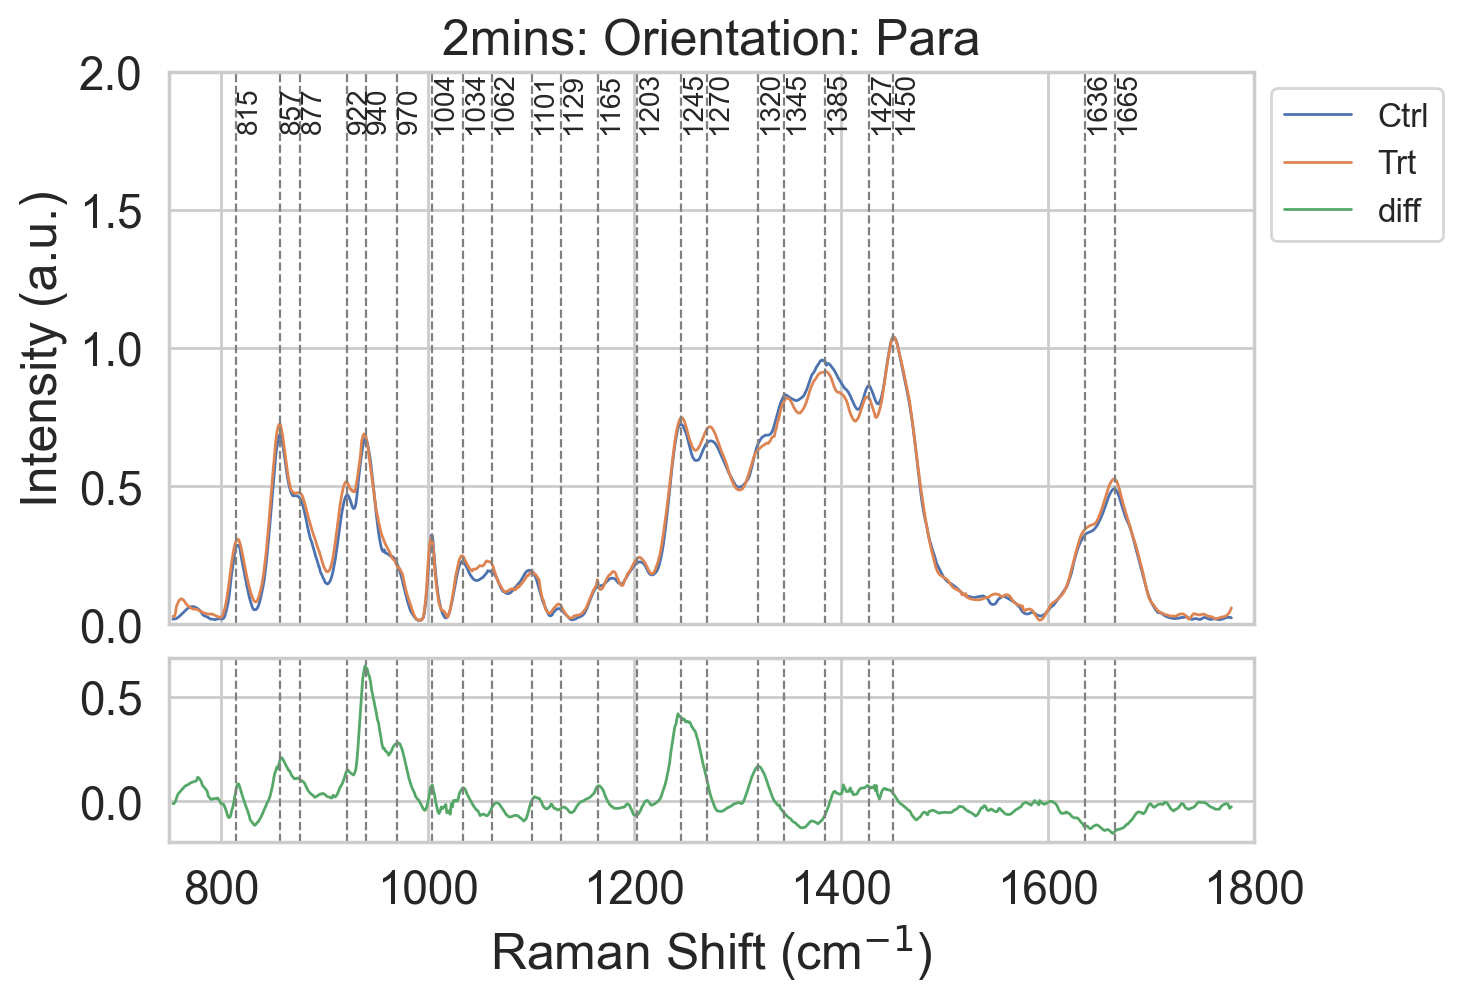

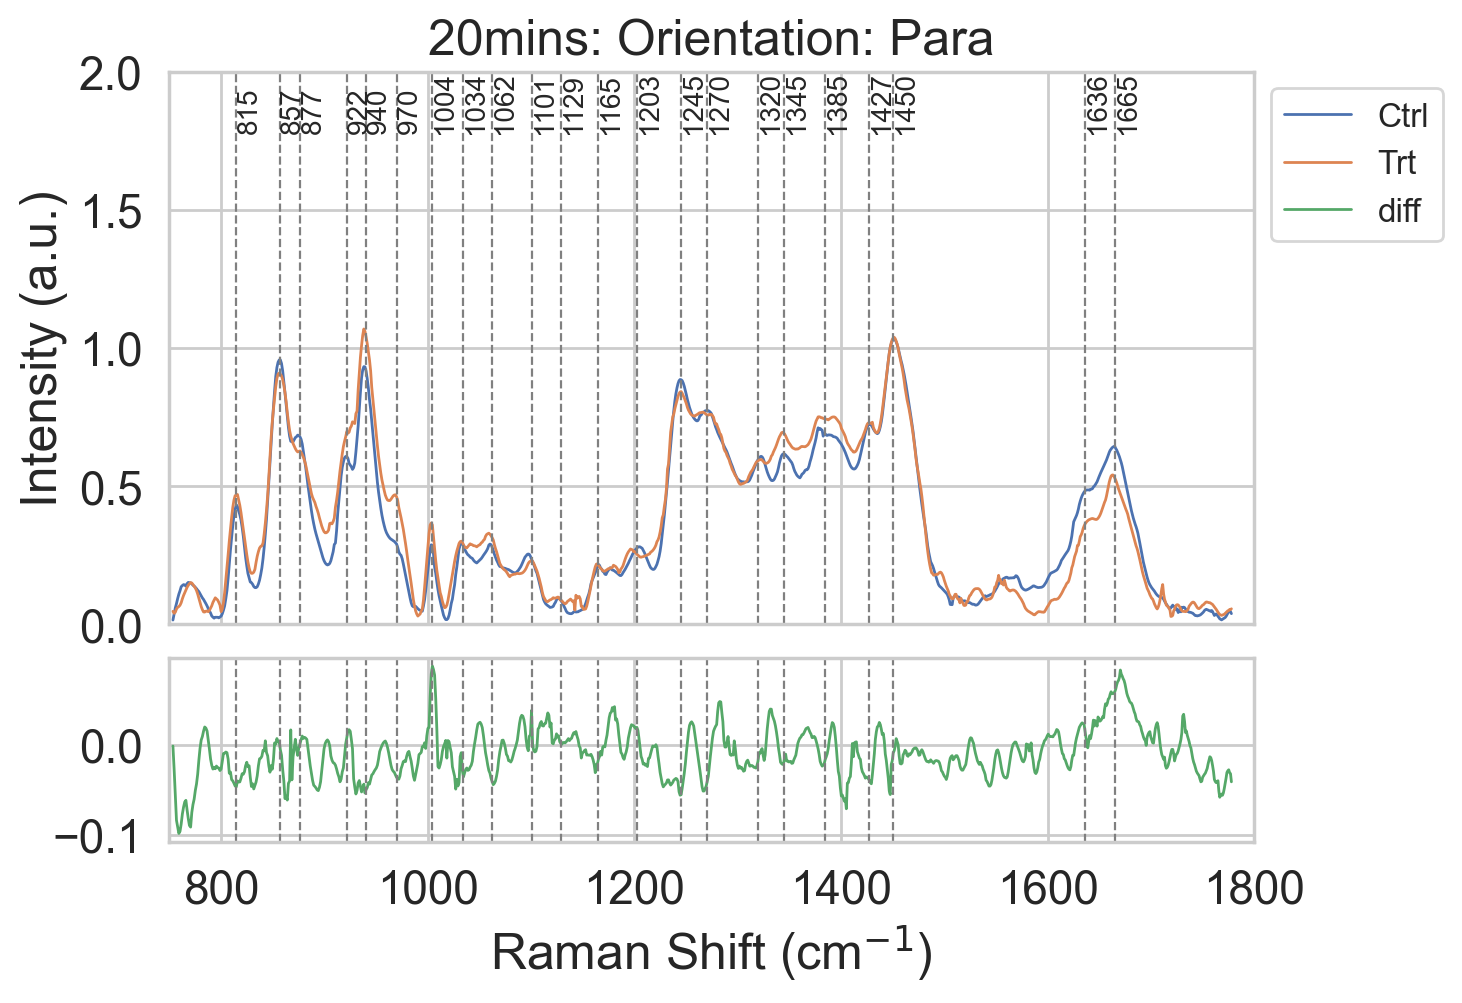

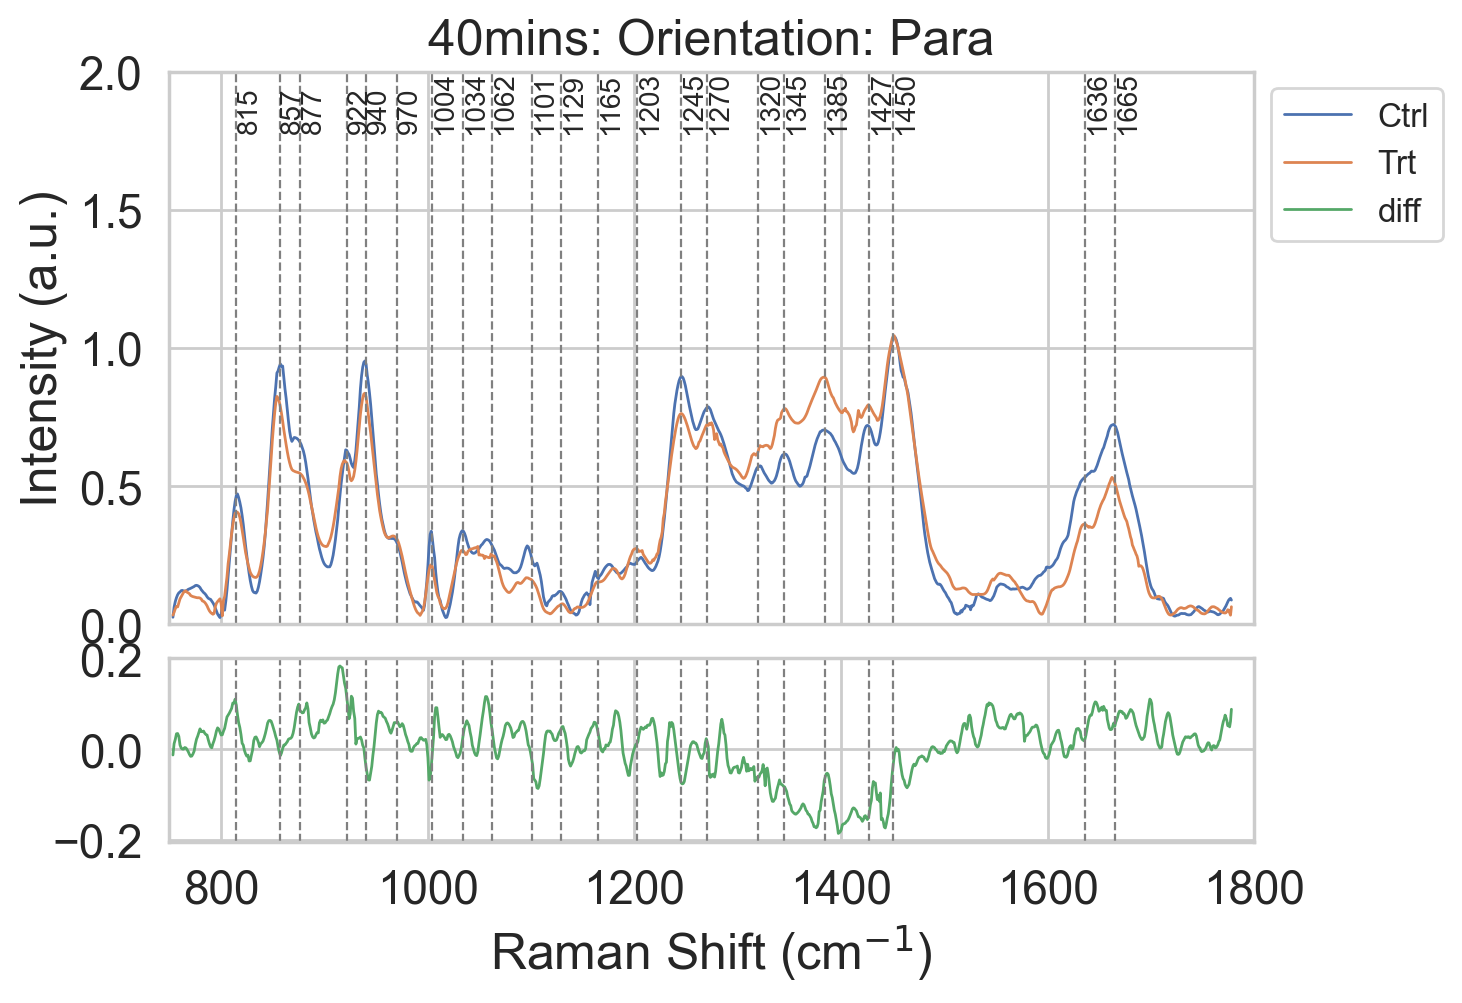

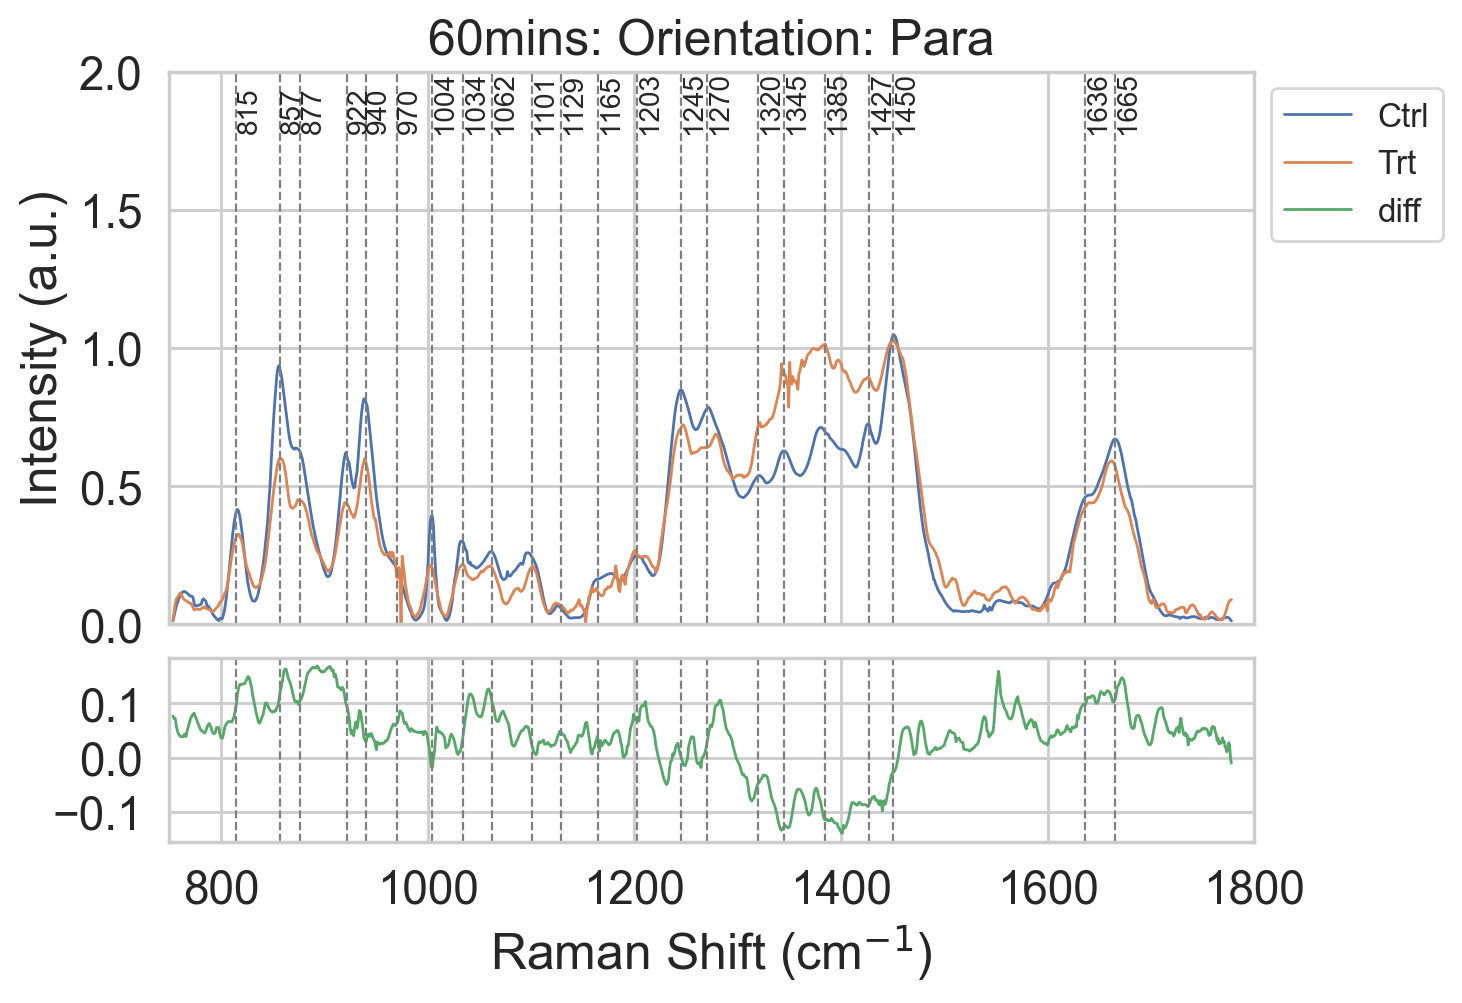

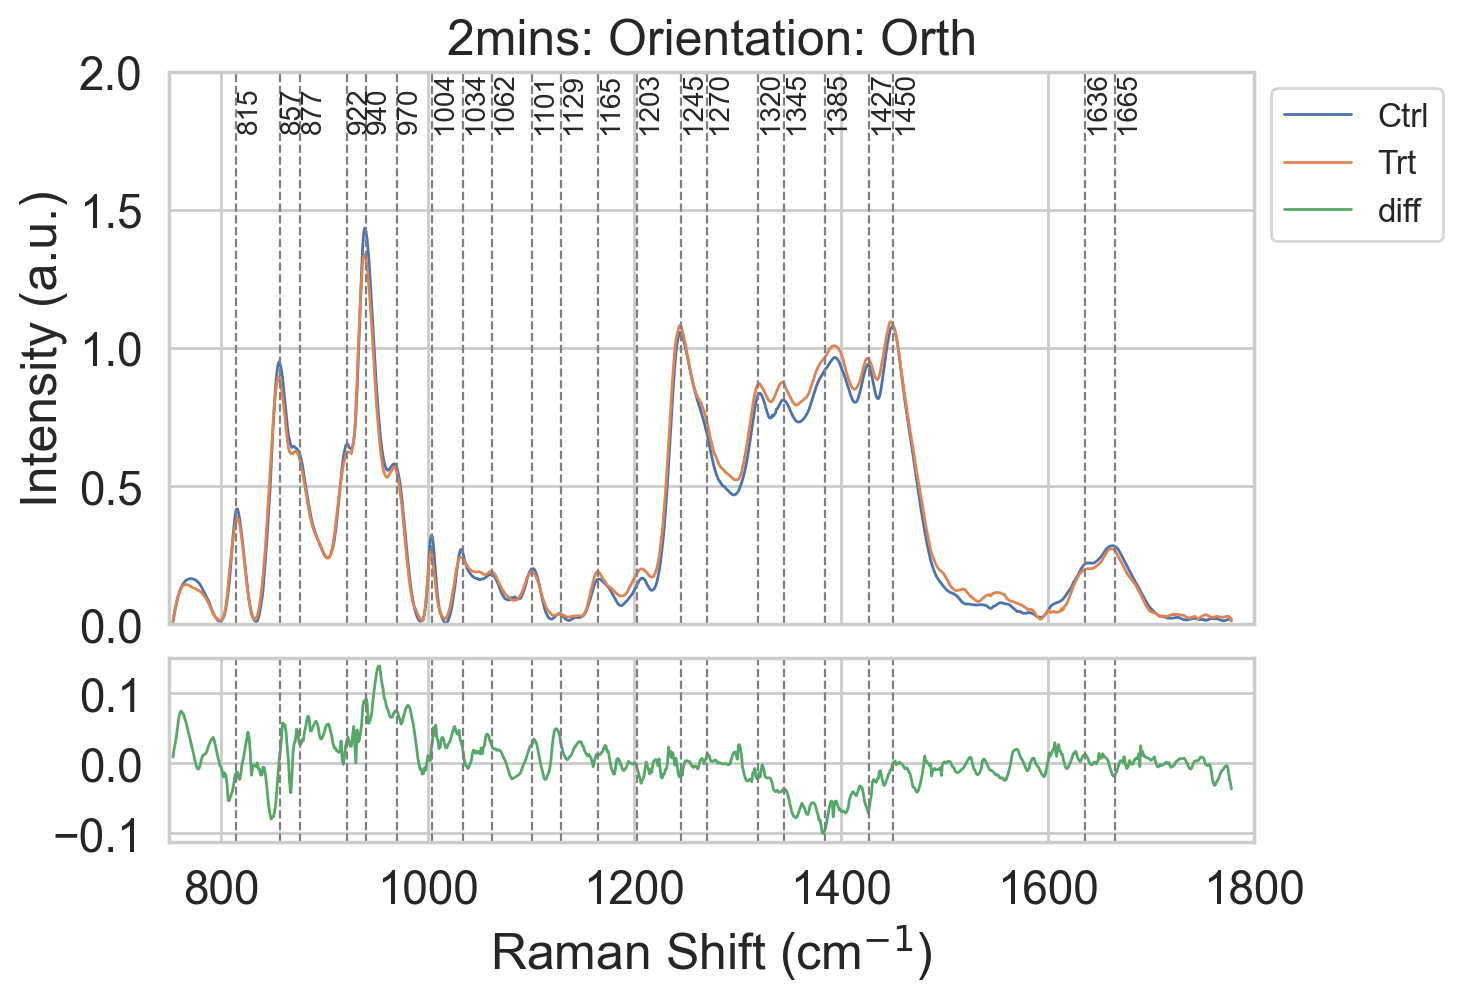

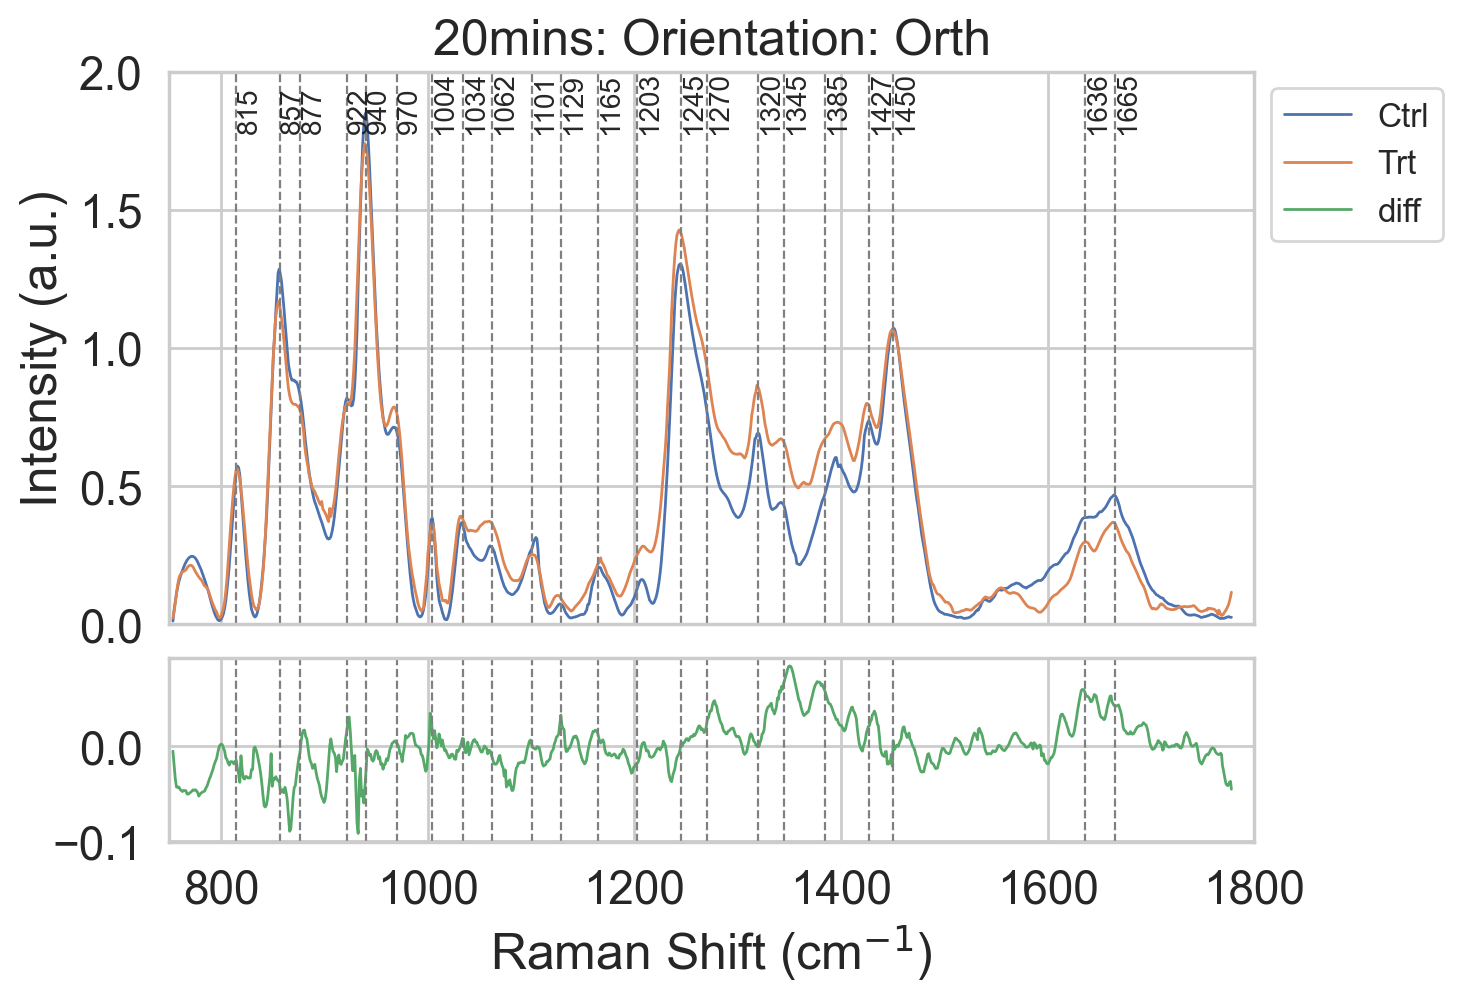

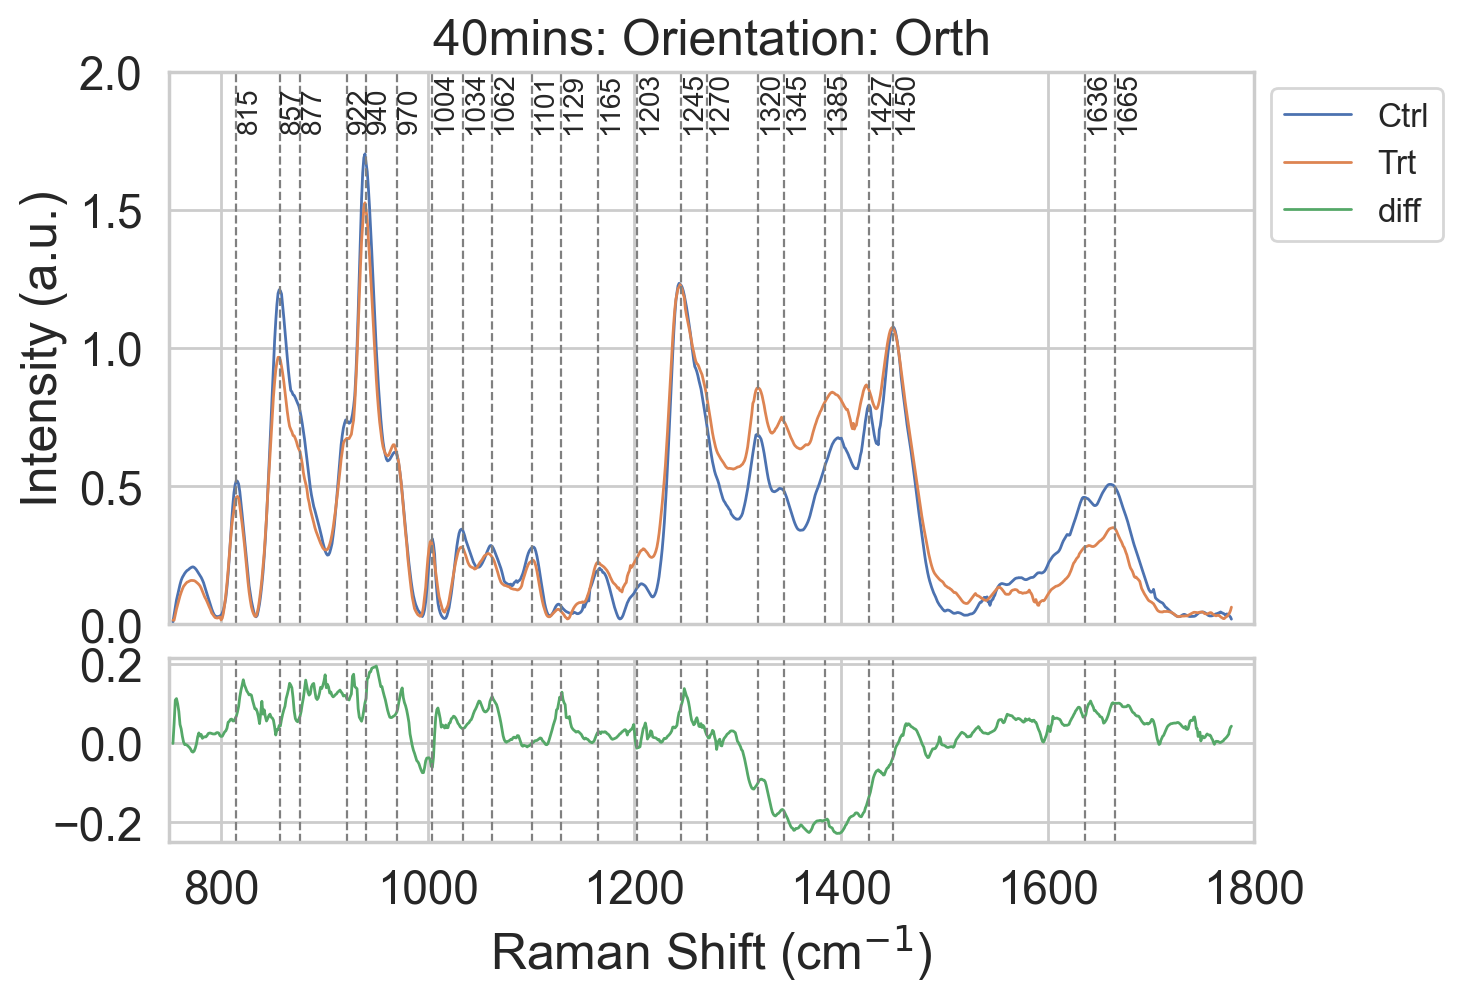

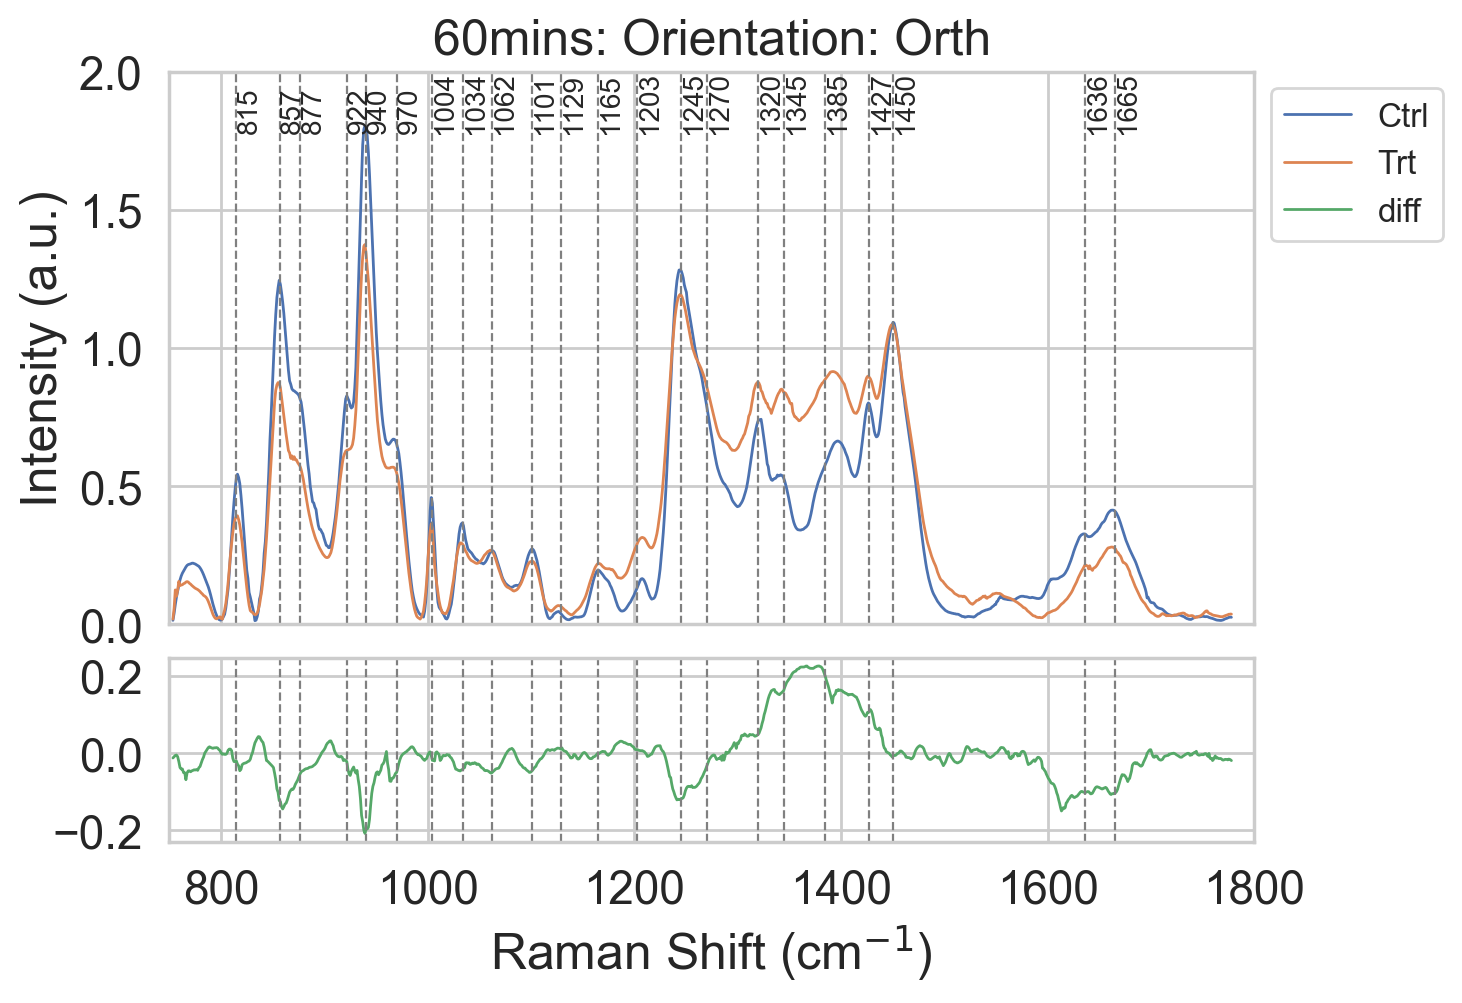

In [655]:
for x in ['Para', 'Orth']:
    for y in ['2mins','20mins','40mins', '60mins']:#, '24h'
        fig, (ax_low, ax_high) = plt.subplots(2, 1, sharex=True, figsize=(7, 5), dpi = 200,
                                            gridspec_kw={'height_ratios': [3, 1]})
        fig.subplots_adjust(hspace=0.09)
        sns.lineplot(
            data=df_sam_spec[(df_sam_spec['orient'] == x) & (df_sam_spec['trt_time'] == y) & (df_sam_spec['sample'].str.contains('diff'))], #[df_sam['Trt'].isin(['pbs', '2mins'])], 
            x='variable', 
            y='value', 
            hue='sample', 
            errorbar=None, 
            #style='sample', 
            hue_order=['Ctrl', 'Trt', 'diff'], #['2mins','20mins','40mins', '60mins'],#'PBS', ['Parallel', 'NP'], #, 'diff_final'
            legend = False,
            lw = 1,
            ax = ax_high
        );
        sns.lineplot(
            data=df_sam_spec[(df_sam_spec['orient'] == x) & (df_sam_spec['trt_time'].isin([y, f'{y}24h'])) & (df_sam_spec['sample'].isin(['Ctrl', 'Trt','Trt_final']))], #[df_sam['Trt'].isin(['pbs', '2mins'])], 
            x='variable', 
            y='value', 
            hue='sample', 
            errorbar=None, 
            #style='sample', 
            hue_order=['Ctrl', 'Trt', 'diff'], #['2mins','20mins','40mins', '60mins'],#'PBS', ['Parallel', 'NP'], #, 'Trt_final'
            #legend = False,
            lw = 1,
            ax = ax_low
        );
        # Set the x-axis limit
        plt.xlim(750, 1780);
        ax_low.set_ylim(0, 2)

        # Add labels and title
        ax_high.set_xlabel("Raman Shift (cm$^{-1}$)");
        ax_high.set_ylabel('');
        ax_low.set_ylabel('Intensity (a.u.)');
        ax_low.set_title(f'{y}: Orientation: {x}')
        #lt.title('Stacked Spectral Data with Continuous Y-Axis Ticks and Subgroups')
        ax_low.legend(bbox_to_anchor = (1, 1), fontsize = 12);
        plt.xticks([800, 1000,  1200, 1400, 1600, 1800]);
        for v in [815, 857, 877, 922, 940, 970, 1004,1034, 1062, 1101, 1129, 1165, 1203, 1245, 1270, 1320, 1345, 1385, 1427, 1450, 1636, 1665]:
            ax_low.axvline(v, color = 'gray', ls = '--', lw = .8)
            ax_high.axvline(v, color = 'gray', ls = '--', lw = .8)
            if v in [1242,1630]:
                ax_low.text(v - .5, 1.8, rotation = 90, fontsize = 10, s = f'{v}', horizontalalignment='right')
            else:
                ax_low.text(v+0.08, 1.8, rotation = 90, fontsize = 10, s = f'{v}')

In [589]:
dt_norm.columns[850:950]

Index(['1621.63', '1622.54', '1623.45', '1624.36', '1625.27', '1626.18',
       '1627.09', '1628', '1628.91', '1629.82', '1630.72', '1631.63',
       '1632.54', '1633.45', '1634.35', '1635.26', '1636.17', '1637.07',
       '1637.98', '1638.88', '1639.79', '1640.69', '1641.6', '1642.51',
       '1643.41', '1644.31', '1645.22', '1646.12', '1647.02', '1647.93',
       '1648.83', '1649.73', '1650.64', '1651.54', '1652.44', '1653.34',
       '1654.24', '1655.14', '1656.04', '1656.94', '1657.85', '1658.75',
       '1659.65', '1660.54', '1661.44', '1662.34', '1663.24', '1664.14',
       '1665.04', '1665.94', '1666.83', '1667.73', '1668.63', '1669.53',
       '1670.42', '1671.32', '1672.21', '1673.11', '1674.01', '1674.9',
       '1675.8', '1676.69', '1677.59', '1678.48', '1679.37', '1680.27',
       '1681.16', '1682.06', '1682.95', '1683.84', '1684.73', '1685.63',
       '1686.52', '1687.41', '1688.3', '1689.19', '1690.08', '1690.97',
       '1691.87', '1692.76', '1693.65', '1694.54', '1695.4

In [656]:
tt_ratio = pd.concat([dt_norm.iloc[:, :3], dt_norm['1636.17']/dt_norm['1665.94']], axis=1)
tt_ratio = tt_ratio.rename({0: 'ratio'}, axis=1)
tt_ratio.head()

sample trt_time orient     ratio
0   Ctrl   20mins   Orth  0.912959
1   Ctrl   20mins   Orth  0.878101
2   Ctrl   20mins   Orth  0.788930
3   Ctrl   20mins   Orth  0.847497
4   Ctrl   20mins   Orth  0.785040

Text(0, 0.5, 'Intensity Ratio (940/922)')

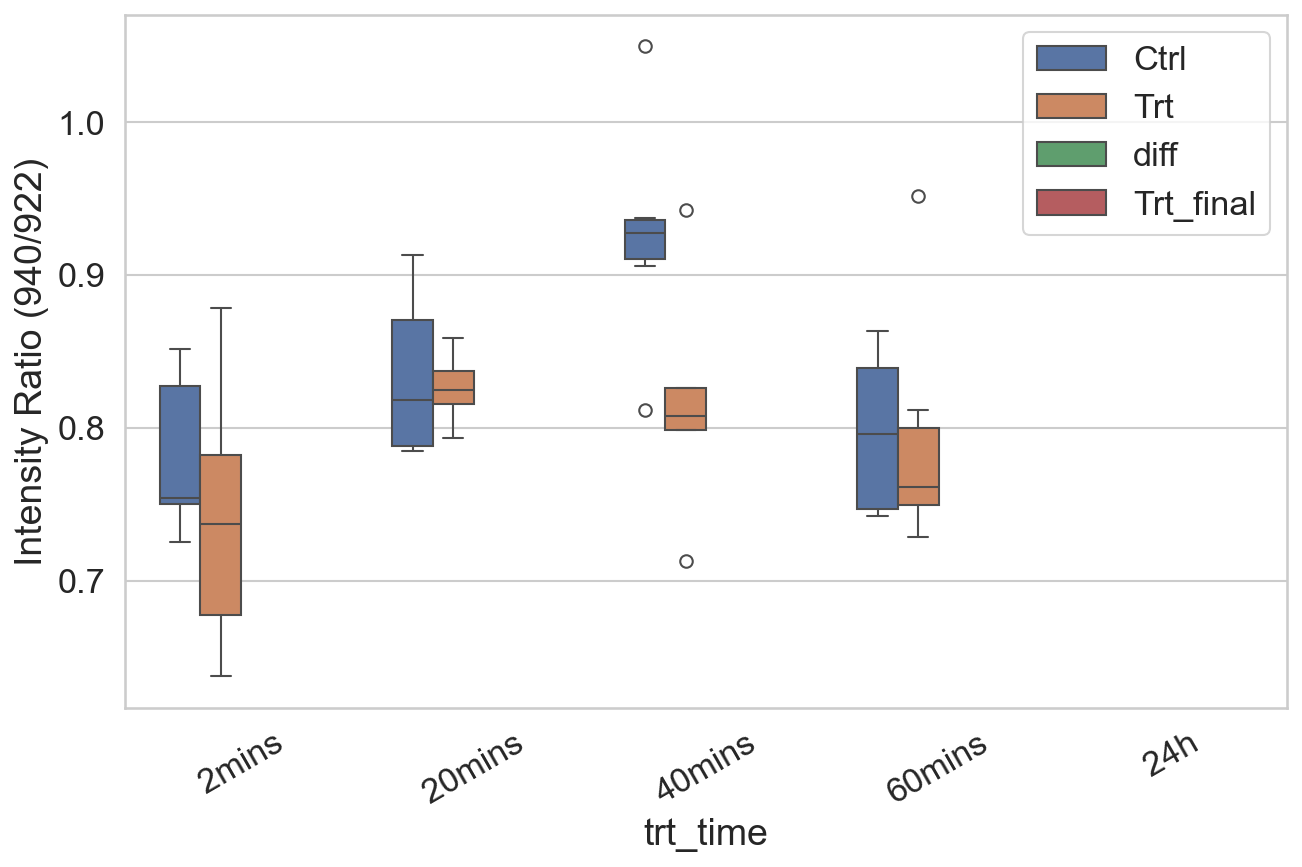

In [657]:
plt.figure(figsize = (10,6), dpi = 150);
sns.boxplot(
    x = 'trt_time',
    y = 'ratio',
    data = tt_ratio[tt_ratio['orient'] == 'Orth'],
    hue = 'sample',
    hue_order=['Ctrl', 'Trt', 'diff', 'Trt_final'],
    order=['2mins', '20mins','40mins', '60mins', '24h'],
    width=.7
);
plt.xticks(rotation = 30);
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('Intensity Ratio (940/922)')

** Deep dive into the differences between peaks at specified wavelengths, to also view shifts in the peaks.

In [532]:
df_sam.head()

sample trt_time orient  variable     value
0   Ctrl   20mins   Orth   753.561  0.021149
1   Ctrl   20mins   Orth   753.561  0.020308
2   Ctrl   20mins   Orth   753.561  0.009964
3   Ctrl   20mins   Orth   753.561  0.003516
4   Ctrl   20mins   Orth   753.561  0.010192

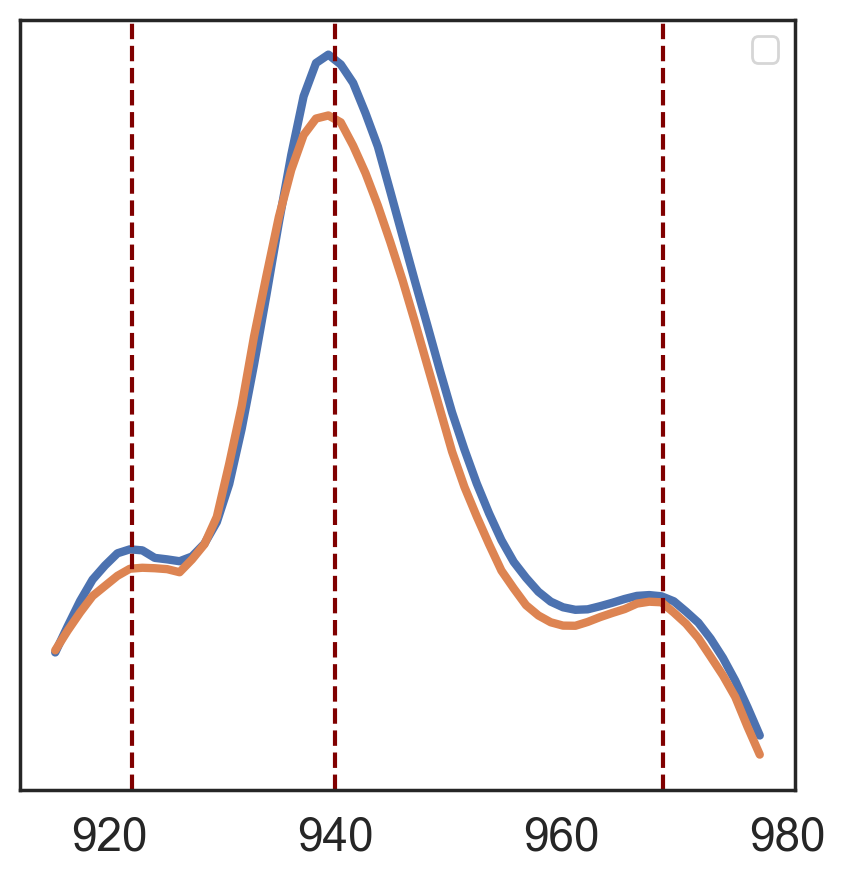

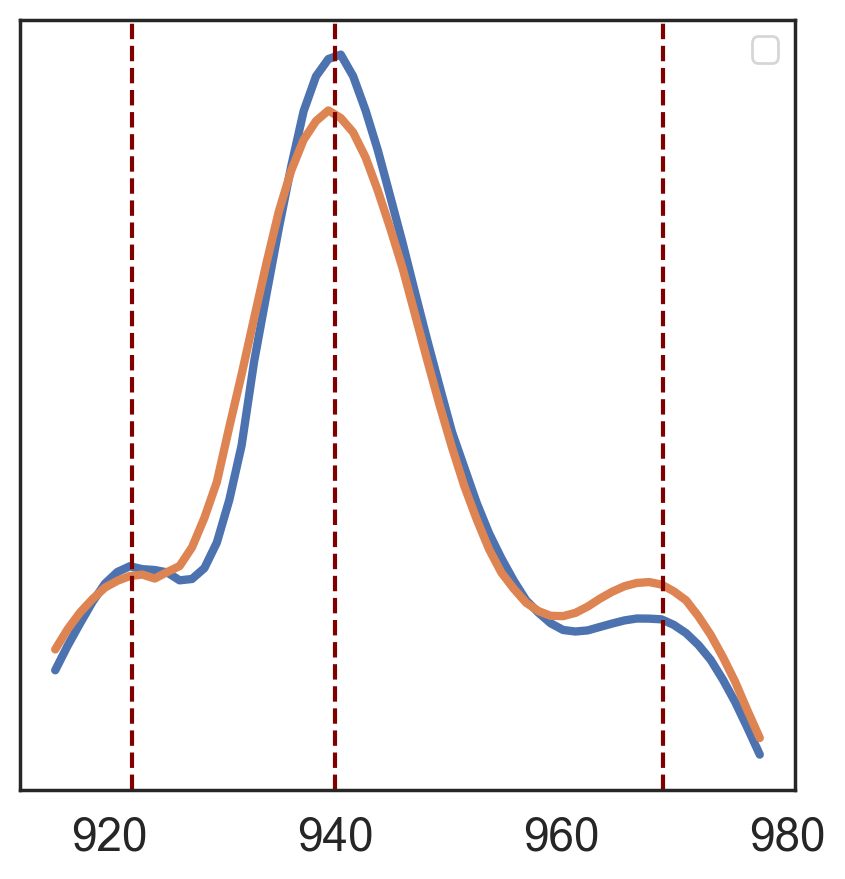

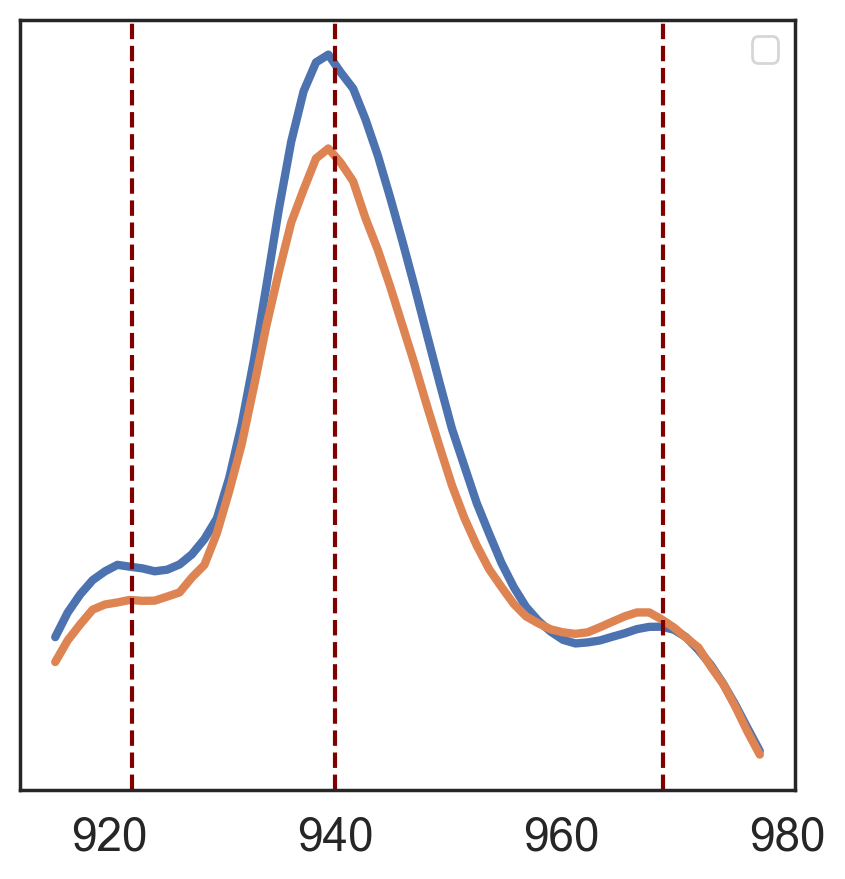

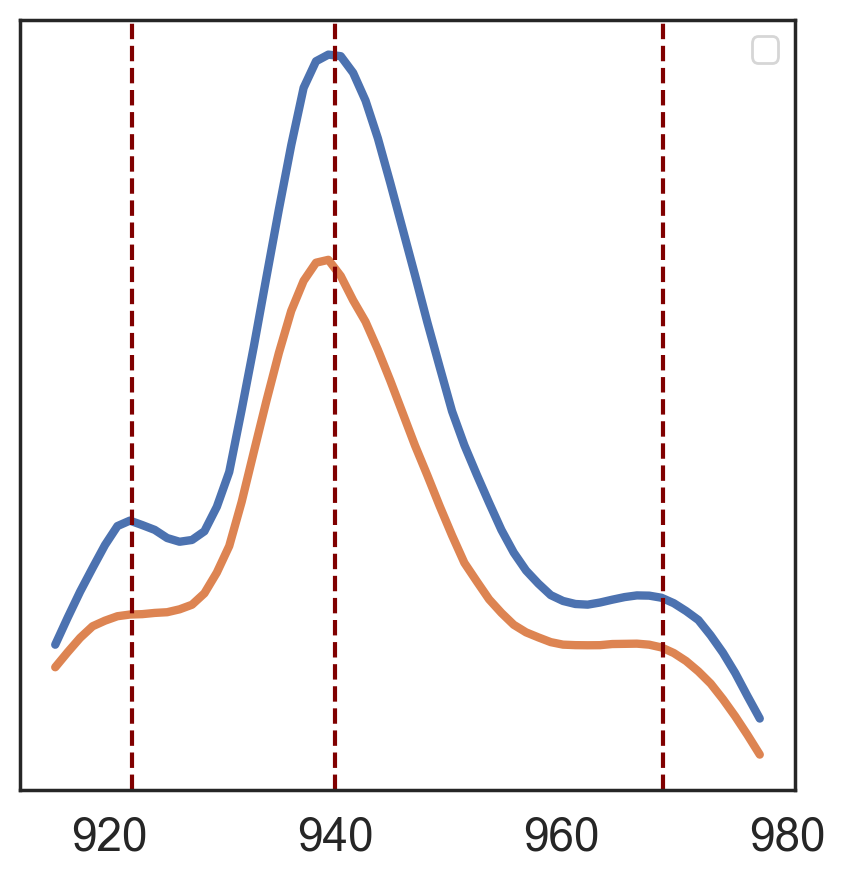

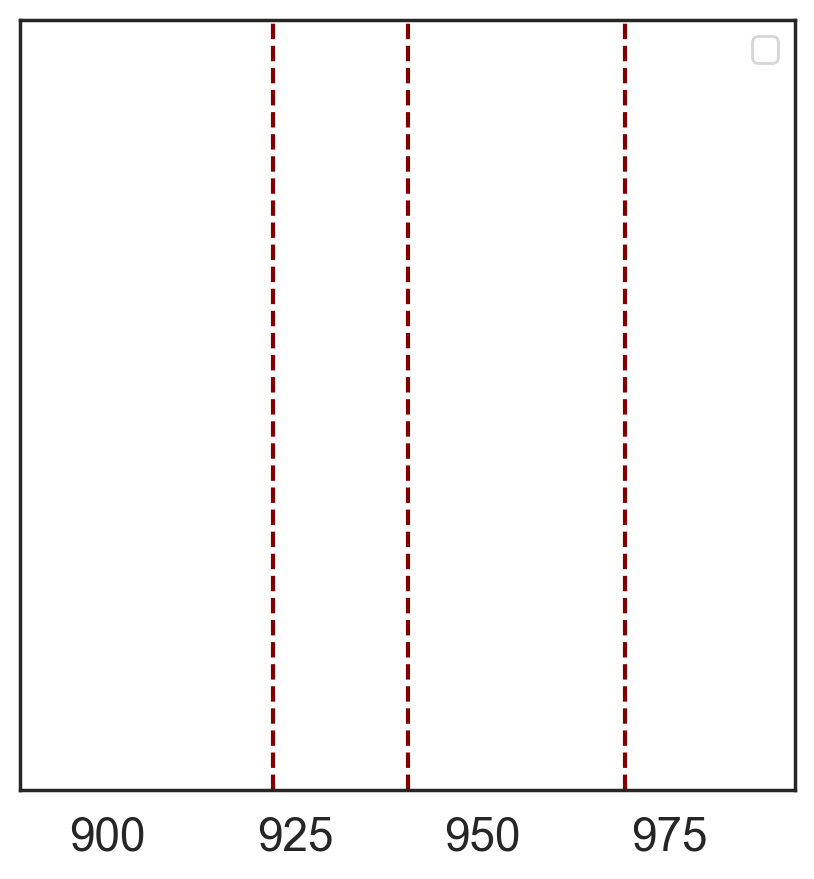

In [686]:
for t in ['2mins', '20mins','40mins', '60mins', '24h']:
        plt.figure(figsize = (5, 5), dpi = 200)
        sns.set_style("white")
        sns.lineplot(
                data = df_sam[(df_sam['variable'].between(915, 978)) & (df_sam['orient'] == 'Orth') & (~df_sam['sample'].str.contains('diff')) & (df_sam['trt_time'] == t)], #[df_sam[''].isin(['32mins', 'control']) == False], #[df_sam[''].str.contains('NP')], #& (df_sam['pre/post'] == 'post')
                #() & df_sam[''].isin(['Polarized','PolarizedRinsed'])
                #'P_Rinsed', 'NP_Rinsed', 'P_Unrinsed', 'NP_Unrinsed', 'P', 'NP'
                x = 'variable',
                y = 'value',
                hue = 'sample',
                hue_order=['Ctrl', 'Trt', 'diff', 'Trt_final'],
                #style='sample',
                #label = 'Xlinked_1%',
                #linestyle = '--',
                #ax = ax1,
                errorbar=None,
                lw = 3
                );
        
        #plt.xlim(1600, 1700)
        #plt.ylim(0.5, 2500)
        #plt.title(' 0.50% RF Treated Samples')
        #plt.xticks([])
        plt.yticks([])
        plt.ylabel('')#Intensity (a.u.)
        plt.xlabel('')#Raman Shift (/cm)
        plt.legend([], bbox_to_anchor = (1, 1), fontsize = 12)
        #plt.axvline(856, ls = '--', color = 'maroon')
        plt.axvline(940, ls = '--', color = 'maroon')
        #plt.axvline(873, ls = '--', color = 'maroon')
        plt.axvline(922, ls = '--', color = 'maroon')
        plt.axvline(969, ls = '--', color = 'maroon')

## Calculate and plot the difference between the Control and Treated Samples

In [800]:
#exclude the Control (PBS) group
dtn_mean = dt_norm[dt_norm['Trt'] != 'rf'].groupby(['sample']).mean(numeric_only=True)#.drop(['spectra_num'], axis=1)
dtn_mean.head()

753.783   754.926   756.069   757.212   758.353   759.496   760.638  \
sample                                                                          
Control  0.034870  0.032429  0.033424  0.033874  0.038169  0.043202  0.047877   
Treated  0.039065  0.051465  0.059955  0.064683  0.068085  0.070113  0.072515   

          761.779    762.92   764.061  ...   1770.27   1771.14   1772.01  \
sample                                 ...                                 
Control  0.053097  0.055539  0.057910  ...  0.021285  0.021292  0.021435   
Treated  0.073812  0.074460  0.074732  ...  0.026011  0.025504  0.025843   

          1772.87   1773.74   1774.61   1775.47   1776.34   1777.21   1778.07  
sample                                                                         
Control  0.022741  0.025903  0.029209  0.033175  0.039138  0.046916  0.046694  
Treated  0.026845  0.027934  0.029338  0.031144  0.032932  0.032810  0.030065  

[2 rows x 1024 columns]

In [801]:
#calculate difference
dtn_diff = dtn_mean.iloc[1]-dtn_mean.iloc[0]
dtn_diff = dtn_diff.reset_index().rename({0: 'diff'}, axis=1)
#combine the group means and mean difference into one table in long form.
df_mean_diff = pd.concat([dtn_diff, dtn_mean.T.reset_index().iloc[:, 1:]], axis=1)
df_md = df_mean_diff.melt(['index'])

In [802]:
# create offsets for each treatment group, exept the pbs
group_offsets = {
    'Treated': 0,
    'Control': 1,
}
#make a copy of the dataframe
df_md_spectra = df_md.copy()
# add the defined offset value for each group
for group, offset in group_offsets.items():
    df_md_spectra.loc[df_md_spectra['variable']== group, 'value'] += offset

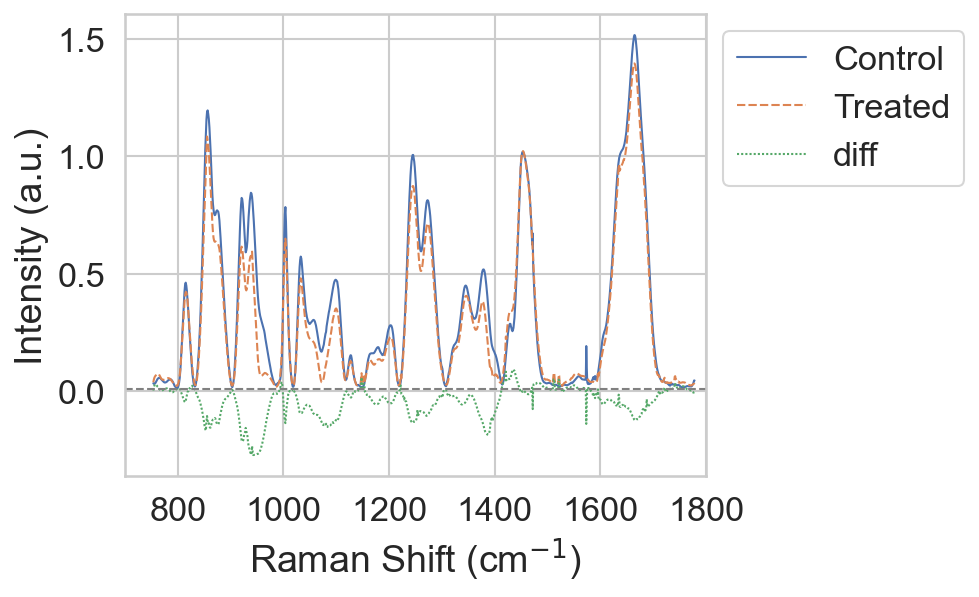

In [803]:
# Create the plot using seaborn
plt.figure(figsize=(5, 4), dpi = 150);
sns.lineplot(
    data=df_md, #_spectra, 
    x=df_md['index'].astype(float), #_spectra
    y='value', 
    hue='variable', 
    errorbar=None, 
    style='variable', 
    style_order= ['Control','Treated','diff'],
    hue_order=['Control','Treated','diff'],
    linewidth = 1
    #legend = False
);
# Set the x-axis limit
plt.xlim(700, 1800);
#plt.ylim(-.6, 3)

# Add labels and title
plt.xlabel("Raman Shift (cm$^{-1}$)");
plt.ylabel('Intensity (a.u.)');
#lt.title('Stacked Spectral Data with Continuous Y-Axis Ticks and Subgroups')
plt.legend(bbox_to_anchor = (1,1));
plt.xticks([800, 1000, 1200, 1400, 1600, 1800]);
plt.axhline(0.01, ls = '--', color = 'gray', lw = 1)

### Explore ratios between peaks of interest

In [775]:
df_sam[df_sam['variable'].between(1600, 1700)]['variable'].unique()

array([1600.8 , 1601.72, 1602.64, 1603.55, 1604.47, 1605.38, 1606.3 ,
       1607.21, 1608.13, 1609.04, 1609.95, 1610.87, 1611.78, 1612.7 ,
       1613.61, 1614.52, 1615.43, 1616.35, 1617.26, 1618.17, 1619.08,
       1619.99, 1620.9 , 1621.81, 1622.72, 1623.63, 1624.54, 1625.45,
       1626.36, 1627.27, 1628.18, 1629.09, 1630.  , 1630.91, 1631.81,
       1632.72, 1633.63, 1634.54, 1635.44, 1636.35, 1637.25, 1638.16,
       1639.07, 1639.97, 1640.88, 1641.78, 1642.69, 1643.59, 1644.49,
       1645.4 , 1646.3 , 1647.21, 1648.11, 1649.01, 1649.91, 1650.82,
       1651.72, 1652.62, 1653.52, 1654.42, 1655.32, 1656.23, 1657.13,
       1658.03, 1658.93, 1659.83, 1660.72, 1661.62, 1662.52, 1663.42,
       1664.32, 1665.22, 1666.12, 1667.01, 1667.91, 1668.81, 1669.71,
       1670.6 , 1671.5 , 1672.39, 1673.29, 1674.19, 1675.08, 1675.98,
       1676.87, 1677.77, 1678.66, 1679.55, 1680.45, 1681.34, 1682.24,
       1683.13, 1684.02, 1684.91, 1685.81, 1686.7 , 1687.59, 1688.48,
       1689.37, 1690

In [792]:
# Calculate peaks ratios for specified peaks
amide1ratio = pd.concat([dt_norm.iloc[:, :3].reset_index(), #[dt_norm['Trt'] != 'pbs']
                         pd.DataFrame(dt_norm['1635.44']/dt_norm['1662.52'], columns = ['ratio']).reset_index()], axis=1)
#amide1ratio.rename({'0': 'ratio'}, inplace=True)
#amide1ratio#.head()

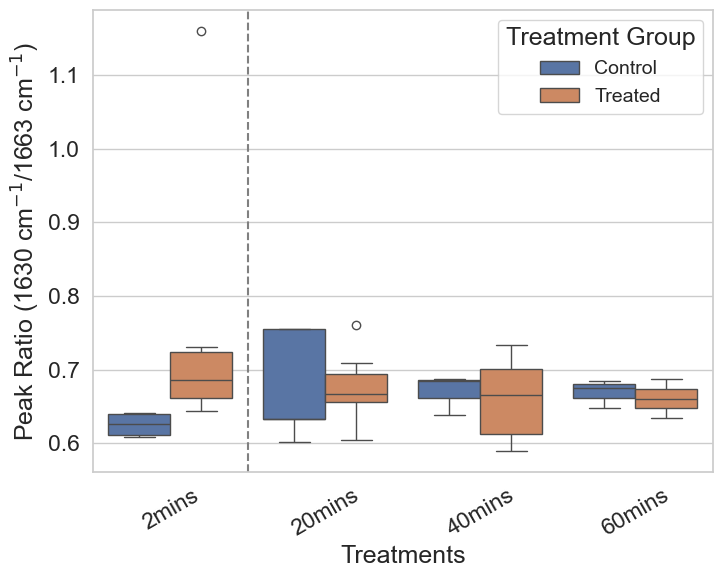

In [794]:
#Plot distribution of ratios over the expeimental period
plt.figure(figsize = (8, 6));
sns.boxplot(
    x = 'Trt',
    y = 'ratio',
    hue = 'sample',
    data = amide1ratio,
    order=['2mins', '20mins','40mins', '60mins'], #, '22mins','27mins'],#,  '32mins'],
    #width=.5,
    #gap = .04,
    hue_order = ['Control', 'Treated'],
    #palette='pastel'
    )
plt.xticks(rotation = 30);
plt.xlabel('Treatments')
plt.axvline(.5, ls = '--', color = 'gray')
plt.ylabel('Peak Ratio (1630 cm$^{-1}$/1663 cm$^{-1}$)')
plt.legend(title = 'Treatment Group', fontsize = 14)
#plt.ylim(0.8, 1.75)

In [494]:
# statistical differene of means between treament groups
tukey = pairwise_tukeyhsd(endog=amide1ratio['ratio'],
                          groups=amide1ratio['group'],
                          alpha=0.05)

#display results
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1  group2 meandiff p-adj lower  upper  reject
---------------------------------------------------
control treated   0.2042   0.0 0.1587 0.2498   True
---------------------------------------------------


In [495]:
t_stat, p_val = stats.ttest_ind(
        amide1ratio[(amide1ratio['group'] == 'control')]['ratio'], 
        amide1ratio[(amide1ratio['group'] == 'treated')]['ratio'],
        #equal_var=False
        )
print(f"p-ratio ({v}): ", p_val)

p-ratio (1663):  1.0296836300094579e-14


In [17]:
dt_norm

sample trt_time orient   753.561   754.704   755.847    756.99   758.132  \
0     Ctrl   20mins   Orth  0.014118  0.028578  0.045369  0.055725  0.062766   
1     Ctrl   20mins   Orth  0.003136  0.022444  0.042022  0.057951  0.069185   
2     Ctrl   20mins   Orth  0.012450  0.029269  0.050008  0.068064  0.083767   
3     Ctrl   20mins   Orth  0.004489  0.031490  0.057164  0.080795  0.101819   
4     Ctrl   20mins   Orth  0.000786  0.012478  0.034008  0.053931  0.071450   
..     ...      ...    ...       ...       ...       ...       ...       ...   
161    Trt   60mins   Para -0.003175  0.026269  0.045640  0.061627  0.076174   
162    Trt   60mins   Para  0.003514  0.031864  0.062940  0.086688  0.100989   
163    Trt   60mins   Para -0.001441  0.027337  0.046419  0.064050  0.079505   
164    Trt   60mins   Para  0.004409  0.055514  0.103326  0.140208  0.166486   
165    Trt   60mins   Para  0.014610  0.071157  0.119712  0.177353  0.188865   

      759.274   760.416  ...    1770.1   1770.96   1771.83    1772.7  \
0    0.069327  0.076586  ...  0.004510  0.010352  0.019356  0.038536   
1    0.083475  0.091919  ...  0.012789  0.010443  0.008525  0.008267   
2    0.102541  0.118330  ...  0.029473  0.029234  0.029230  0.029351   
3    0.120196  0.136248  ...  0.004423  0.003509  0.003522  0.004323   
4    0.087428  0.099871  ...  0.021901  0.025772  0.024072  0.025216   
..        ...       ...  ...       ...       ...       ...       ...   
161  0.084447  0.089602  ...  0.018542  0.023167  0.026579  0.028531   
162  0.110768  0.117703  ...  0.012325  0.012364  0.012331  0.011964   
163  0.094606  0.110703  ...  0.037536  0.034336  0.030390  0.025797   
164  0.183027  0.189497  ...  0.035264  0.037940  0.042140  0.044784   
165  0.171725  0.134496  ...  0.015614  0.014259  0.012082  0.009809   

      1773.57   1774.43    1775.3   1776.16   1777.03    1777.9  
0    0.048736  0.061845  0.075466  0.082187  0.070463  0.038632  
1    0.011506  0.021788  0.027797  0.040647  0.044973  0.040071  
2    0.029143  0.027438  0.024457  0.020478  0.015025  0.008502  
3    0.006131  0.009044  0.013144  0.018492  0.025122  0.033047  
4    0.026775  0.029303  0.031347  0.034655  0.039346  0.044906  
..        ...       ...       ...       ...       ...       ...  
161  0.032072  0.036717  0.036404  0.034718  0.028946 -0.001440  
162  0.011821  0.012158  0.016868  0.023508  0.032219  0.043168  
163  0.020752  0.015622  0.010500  0.008356  0.007420  0.009662  
164  0.048951  0.059161  0.072494  0.082928  0.089271  0.083519  
165  0.007579  0.005684  0.003902  0.003735  0.005143  0.011406  

[166 rows x 1027 columns]

### PCA analyses 

In [173]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler


x = dt_norm[dt_norm['orient'] == 'Orth'].iloc[:, 3:]#dt_norm.iloc[:, 207:607]#MinMaxScaler().fit_transform()
y = dt_norm[dt_norm['orient'] == 'Orth'].iloc[:, :3]

pca = PCA(n_components=5)
pc = pca.fit_transform(x)
pc_df = pd.concat([y.reset_index(drop=True), pd.DataFrame(pc, columns = [f'PC{x}' for x in np.arange(1, 6)])], axis=1)


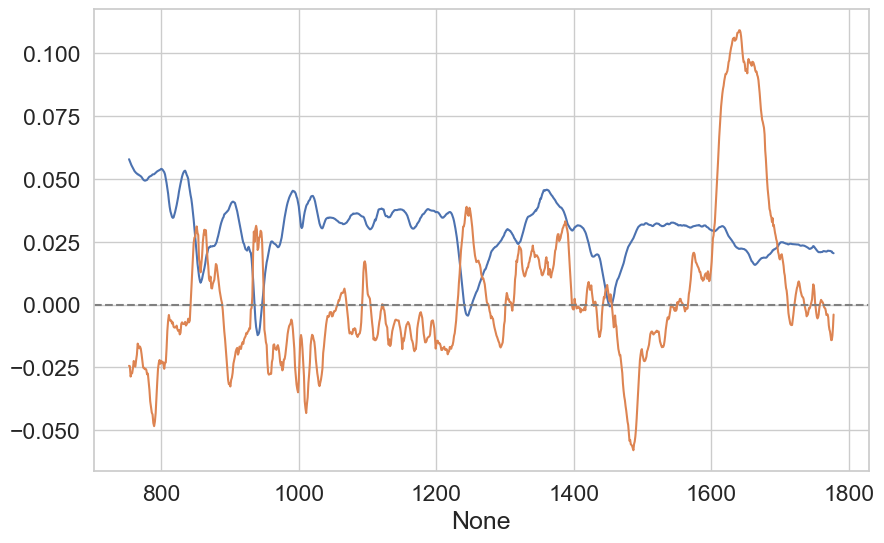

In [174]:
plt.figure(figsize = (10, 6))
sns.lineplot(y = pca.components_[1],
         x = dt_norm[dt_norm['orient'] == 'Orth'].iloc[:, 3:].columns.astype(float))
sns.lineplot(y = pca.components_[3],
         x = dt_norm[dt_norm['orient'] == 'Orth'].iloc[:, 3:].columns.astype(float))
plt.axhline(0, color = 'gray', ls = '--')

Text(0, 0.5, 'Variance Explained')

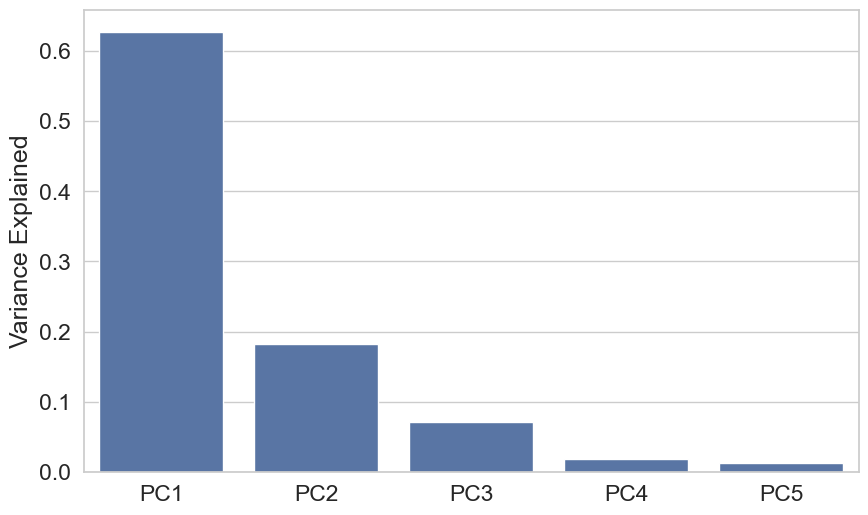

In [175]:
plt.figure(figsize = (10, 6))
sns.barplot(x = [f'PC{x}' for x in np.arange(1, 6)],
            y = pca.explained_variance_ratio_)
plt.ylabel('Variance Explained')

Text(0.5, 1.0, 'PCA Analysis of Cross Linked Mice Tail Tendon (MTT)')

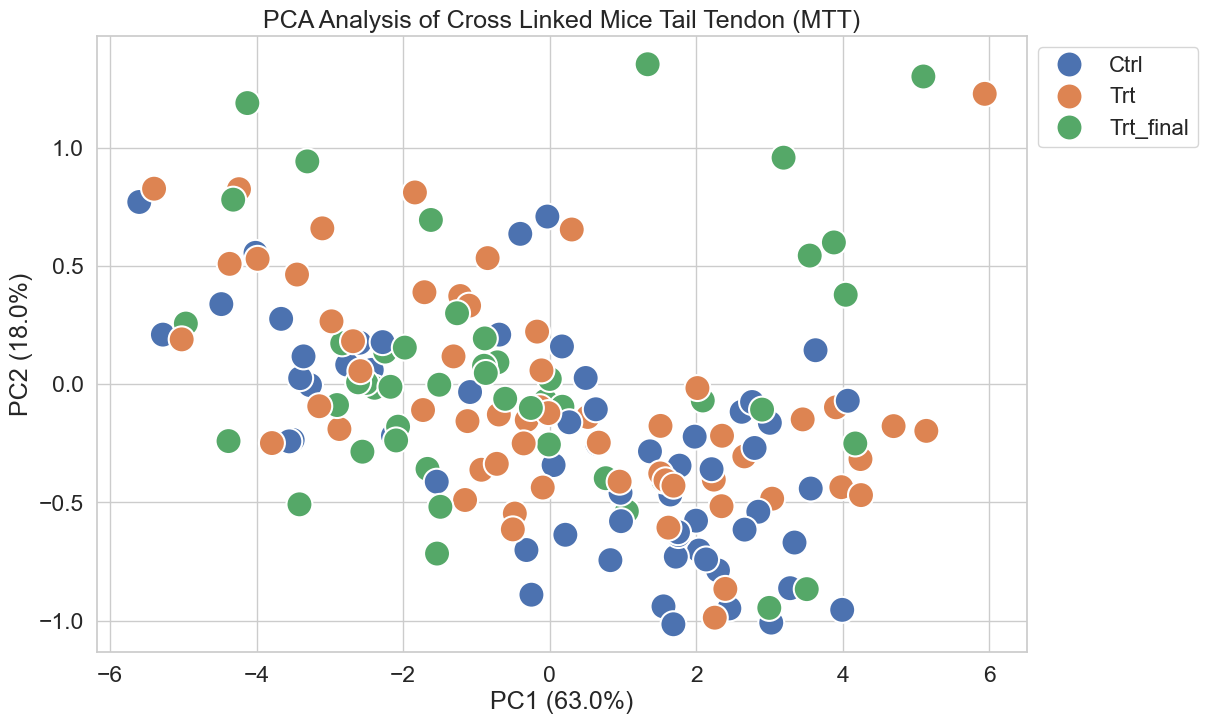

In [178]:
plt.figure(figsize = (12, 8))
sns.scatterplot(
    x = 'PC1',
    y = 'PC2',
    data = pc_df[pc_df['PC2'] < 15],#.groupby(['sample', 'trt_time']).mean(numeric_only=True)
    #[pc_df,#pc_df[pc_df['PC1'] < 50].groupby(['RiboConc', 'Trt']).median().reset_index(), #
    hue = 'sample',
    hue_order = ['Ctrl', 'Trt', 'Trt_final'],
    #hue_order=['2mins', '20mins', '40mins', '60mins', '24h', '2mins24h', '20mins24h',
    #   '40mins24h', '60mins24h'],
    #style = 'trt_time',
    #style_order=['2mins', '20mins', '40mins', '60mins', '24h', '2mins24h', '20mins24h',
    #   '40mins24h', '60mins24h'],
    s = 350
)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0].round(2) * 100}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1].round(2) * 100}%)')
plt.legend(bbox_to_anchor = (1, 1), fontsize = 16)
plt.title('PCA Analysis of Cross Linked Mice Tail Tendon (MTT)')

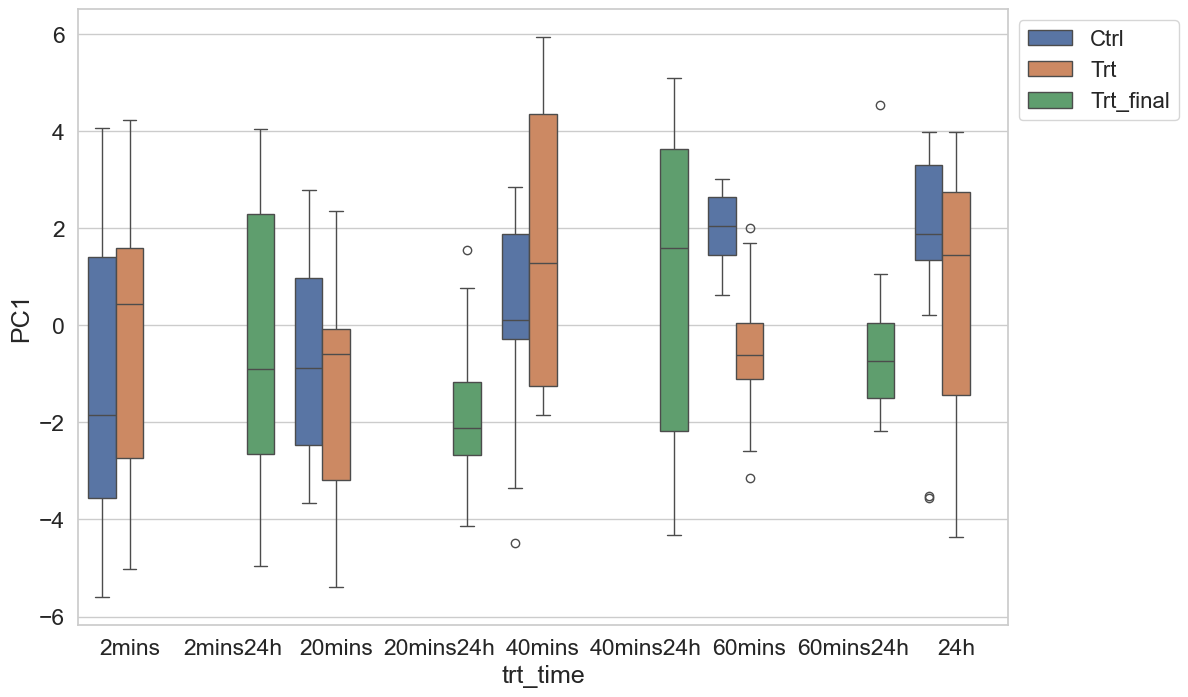

In [228]:
plt.figure(figsize = (12, 8))
sns.boxplot(
    x = 'trt_time',
    y = 'PC1',
    hue = 'sample',
    hue_order=['Ctrl', 'Trt', 'Trt_final'],
    data = pc_df,
    order = ['2mins', '2mins24h', '20mins', '20mins24h', '40mins', '40mins24h', '60mins', '60mins24h', '24h'], #['2mins', '20mins', '40mins', '60mins', '24h', '2mins24h', '20mins24h', '40mins24h', '60mins24h']#['control', 'treated']
    #[pc_df['PC3'] >-10]#[(pc_df['PC1'] < 10) & (df_sam['Trt'].isin(['P_Rinsed', 'P', 'P_Unrinsed']))]
)
#NP_Rinsed, , 'NP_Unrinsed'
plt.legend(bbox_to_anchor = (1, 1), fontsize = 16)
#plt.ylim(-1.5, 1.5)

In [33]:
# Across group t-test
tukey_dfs = []
for x in df_auc['RiboConc'].unique():
    tukey = pairwise_tukeyhsd(endog=df_auc[df_auc['RiboConc'] == x]['1402.2'],
                          groups=df_auc[df_auc['RiboConc'] == x]['Trt'],
                          alpha=0.05)
    print(x)
    print(tukey)
    #print(pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0]))
    print('********************************************')
    tukey_dfs.append(pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0]))

Ribo0.5
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 post1  post2  -9.1074 0.5529 -27.5326   9.3178  False
 post1  post3  56.7997    0.0  38.3745  75.2249   True
 post1    pre  -1.9311 0.9921 -20.3563  16.4941  False
 post2  post3  65.9071    0.0  47.4819  84.3323   True
 post2    pre   7.1763 0.7249 -11.2489  25.6015  False
 post3    pre -58.7308    0.0  -77.156 -40.3056   True
------------------------------------------------------
********************************************
Ribo1
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 post1  post2 -32.3699 0.7857 -125.0513  60.3115  False
 post1  post3 -44.6226 0.5742 -137.3041  48.0588  False
 post1    pre -23.6201 0.9029 -116.3015  69.0613  False
 post2  post3 -12.2527 0.9845 -104.9342  80.4287  False

In [222]:
pc_df

sample trt_time orient       PC1       PC2       PC3       PC4       PC5
0     Ctrl   20mins   Orth -3.272298 -0.003924  0.255158  0.211355 -0.308838
1     Ctrl   20mins   Orth -3.666039  0.276112  0.304124  0.386809 -0.200646
2     Ctrl   20mins   Orth -0.689456  0.209457  0.959994  0.290913  0.122299
3     Ctrl   20mins   Orth -1.087499 -0.033250  0.719612 -0.077161  0.009924
4     Ctrl   20mins   Orth -2.596305  0.175189  0.561871 -0.346574 -0.226738
..     ...      ...    ...       ...       ...       ...       ...       ...
163    Trt   60mins   Orth  2.015732 -0.016439  0.494941 -0.177968  0.278147
164    Trt   60mins   Orth -0.503657 -0.613963 -0.352905 -0.648310 -0.327523
165    Trt   60mins   Orth -0.722669 -0.336896  0.114835 -0.306175 -0.445743
166    Trt   60mins   Orth -2.584566  0.055002 -1.457316 -0.139963 -0.073787
167    Trt   60mins   Orth -3.146026 -0.093216 -1.506883 -0.397708  0.633637

[168 rows x 8 columns]

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(pc_df.iloc[:, 3:], pc_df.iloc[:, :3]) #(x, y, test_size=0.30, random_state=42)

qda = RandomForestClassifier()
qda.fit(X_train, y_train['sample'])

# Make predictions
y_pred_qda = qda.predict(X_test)

# Evaluate the model
print("QDA Accuracy:", accuracy_score(y_test['sample'], y_pred_qda))
print("Confusion Matrix:\n", confusion_matrix(y_test['sample'], y_pred_qda))
print("Classification Report:\n", classification_report(y_test['sample'], y_pred_qda))

QDA Accuracy: 0.38095238095238093
Confusion Matrix:
 [[6 2 3]
 [6 5 6]
 [4 5 5]]
Classification Report:
               precision    recall  f1-score   support

        Ctrl       0.38      0.55      0.44        11
         Trt       0.42      0.29      0.34        17
   Trt_final       0.36      0.36      0.36        14

    accuracy                           0.38        42
   macro avg       0.38      0.40      0.38        42
weighted avg       0.39      0.38      0.38        42



In [224]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(qda.predict_proba(X_test), columns = ['Ctrl', 'Trt', 'Trt_final'])], axis=1)

Text(0.5, 0, '')

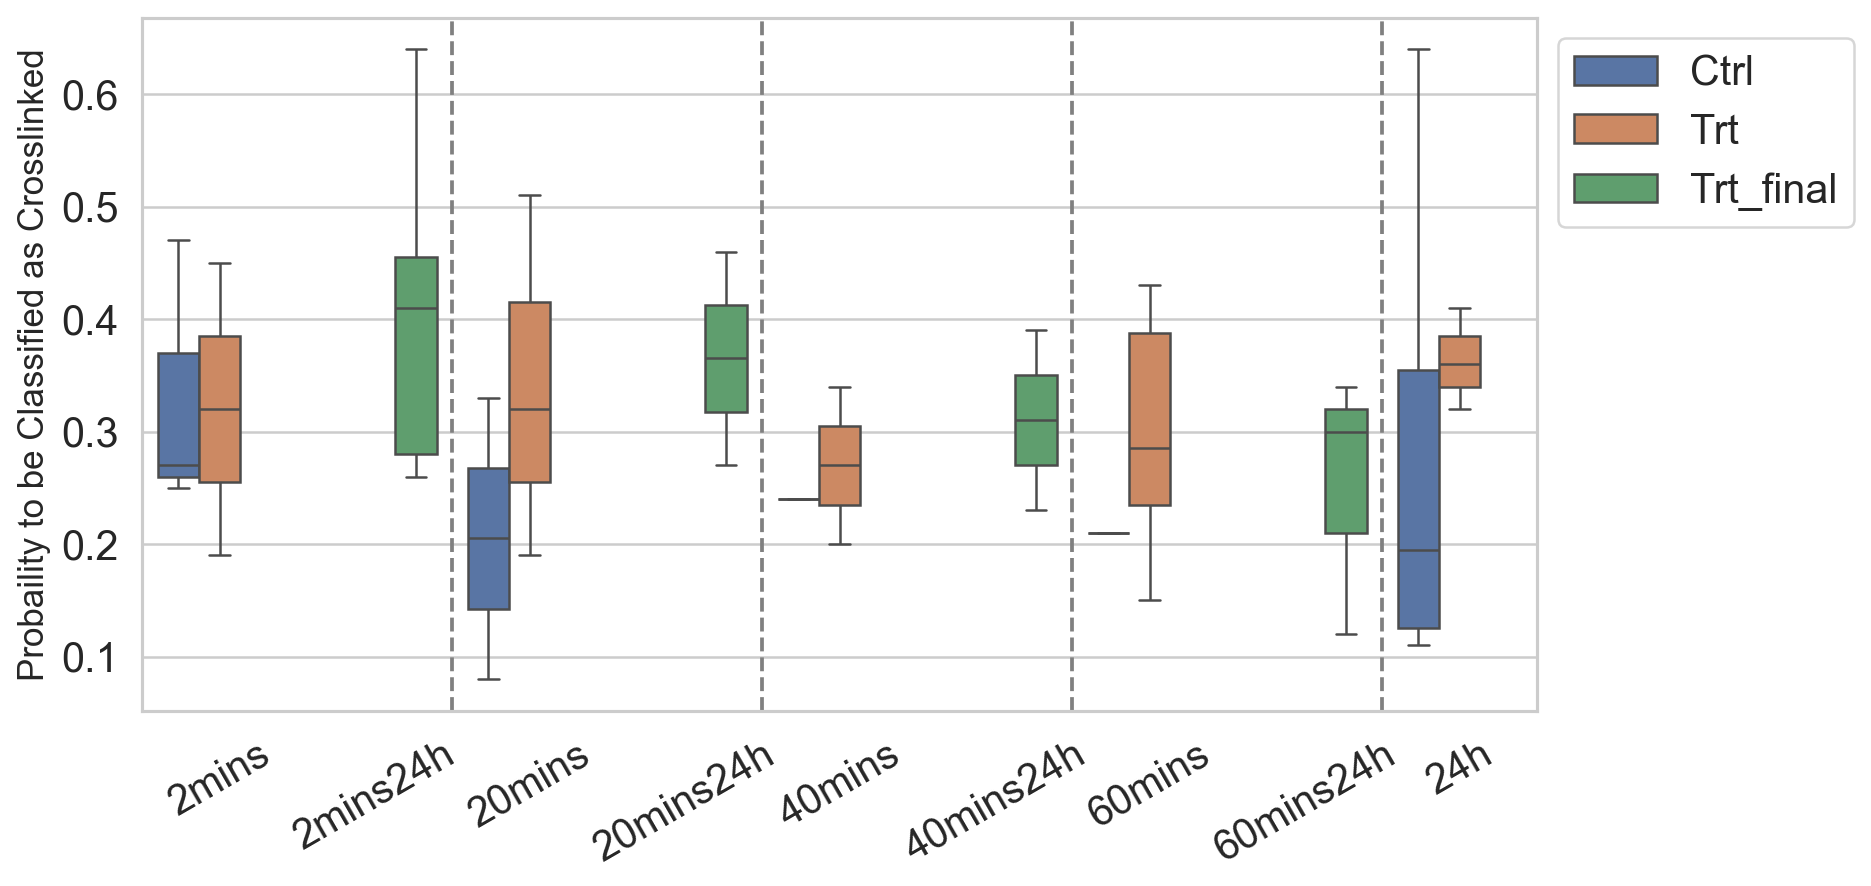

In [225]:

plt.figure(figsize=(10, 5), dpi = 180);
sns.boxplot(
    x = 'trt_time',
    y = 'Trt',
    data = pred_df,
    order = ['2mins', '2mins24h', '20mins', '20mins24h', '40mins', '40mins24h', '60mins', '60mins24h', '24h'], #'Ctrl', 'Trt', 'Trt_final']
    hue = 'sample',
    hue_order= ['Ctrl', 'Trt', 'Trt_final']
);
plt.xticks(rotation = 30);
plt.legend(bbox_to_anchor = (1,1))
plt.axvline(1.5, ls = '--', color = 'gray')
plt.axvline(3.5, ls = '--', color = 'gray')
plt.axvline(5.5, ls = '--', color = 'gray')
plt.axvline(7.5, ls = '--', color = 'gray')

plt.ylabel('Probaility to be Classified as Crosslinked', fontdict={'fontsize': 14})
plt.xlabel('')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

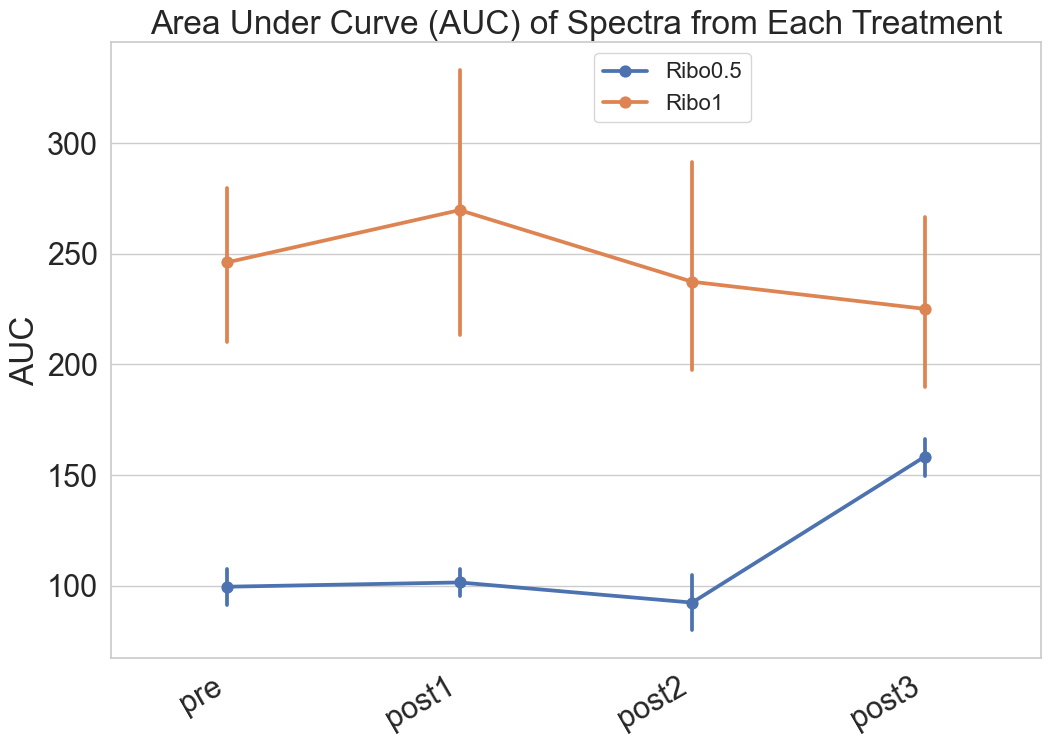

In [34]:
plt.figure(figsize = (12, 8));
sns.pointplot(
    data = df_auc,
    x = 'Trt',
    y = '1402.2',
    hue = 'RiboConc',
    #hue_order=['pre','post1','post2', 'post3']
    order= ['pre','post1','post2', 'post3'],
              );
plt.xticks(rotation = 30, ha = 'right');
plt.xlabel('');
plt.ylabel('AUC')
plt.title('Area Under Curve (AUC) of Spectra from Each Treatment');
plt.legend(fontsize = 16, bbox_to_anchor = (.7, 1));

In [374]:
dfm = dt_norm.groupby(['RiboConc', 'pre/post']).mean(numeric_only=True).reset_index()
dfm

RiboConc pre/post   219.694   222.708   225.721   228.732   231.743  \
0  Ribo0.5     post  0.143181  0.121509  0.102797  0.086361  0.072693   
1  Ribo0.5      pre  0.093481  0.072354  0.055751  0.041378  0.032330   
2    Ribo1     post  0.696855  0.660384  0.625499  0.592905  0.562351   
3    Ribo1      pre  0.704311  0.671063  0.640527  0.612315  0.585241   

    234.751   237.758   240.763  ...   2560.69   2562.61   2564.52   2566.44  \
0  0.061603  0.052288  0.044915  ...  0.004375  0.004380  0.004001  0.003847   
1  0.024496  0.017483  0.012662  ...  0.001982  0.002419  0.002756  0.002375   
2  0.533264  0.505601  0.479531  ...  0.217250  0.218314  0.219204  0.220020   
3  0.559023  0.533998  0.509437  ...  0.357509  0.358943  0.360377  0.361634   

    2568.36   2570.27   2572.18    2574.1   2576.01   2577.92  
0  0.003668  0.003405  0.002286  0.001167  0.000494 -0.000307  
1  0.002244  0.001877  0.001588  0.001378  0.001654  0.000784  
2  0.220827  0.221568  0.222583  0.223451  0.224478  0.225148  
3  0.362691  0.364004  0.365464  0.367117  0.368726  0.369176  

[4 rows x 981 columns]

In [375]:
drt = pd.concat([pd.DataFrame(dfm[dfm['RiboConc'].str.contains('0.5')].iloc[0, 3:] - dfm[dfm['RiboConc'].str.contains('0.5')].iloc[1, 3:]).T, 
           pd.DataFrame(dfm[dfm['RiboConc'].str.contains('1')].iloc[0, 3:] - dfm[dfm['RiboConc'].str.contains('1')].iloc[1, 3:]).T])#.insert(0, 'RiboConc', ['Ribo0.5', 'Ribo1'])

In [376]:
drt.insert(0, 'RiboConc', ['Ribo0.5', 'Ribo1'])

In [377]:
drt = drt.melt(id_vars = 'RiboConc')
drt[['variable', 'value']] = drt[['variable', 'value']].astype(float)
drt

RiboConc  variable     value
0     Ribo0.5   222.708  0.049155
1       Ribo1   222.708 -0.010678
2     Ribo0.5   225.721  0.047046
3       Ribo1   225.721 -0.015028
4     Ribo0.5   228.732  0.044983
...       ...       ...       ...
1951    Ribo1  2574.100 -0.143667
1952  Ribo0.5  2576.010 -0.001160
1953    Ribo1  2576.010 -0.144248
1954  Ribo0.5  2577.920 -0.001091
1955    Ribo1  2577.920 -0.144028

[1956 rows x 3 columns]

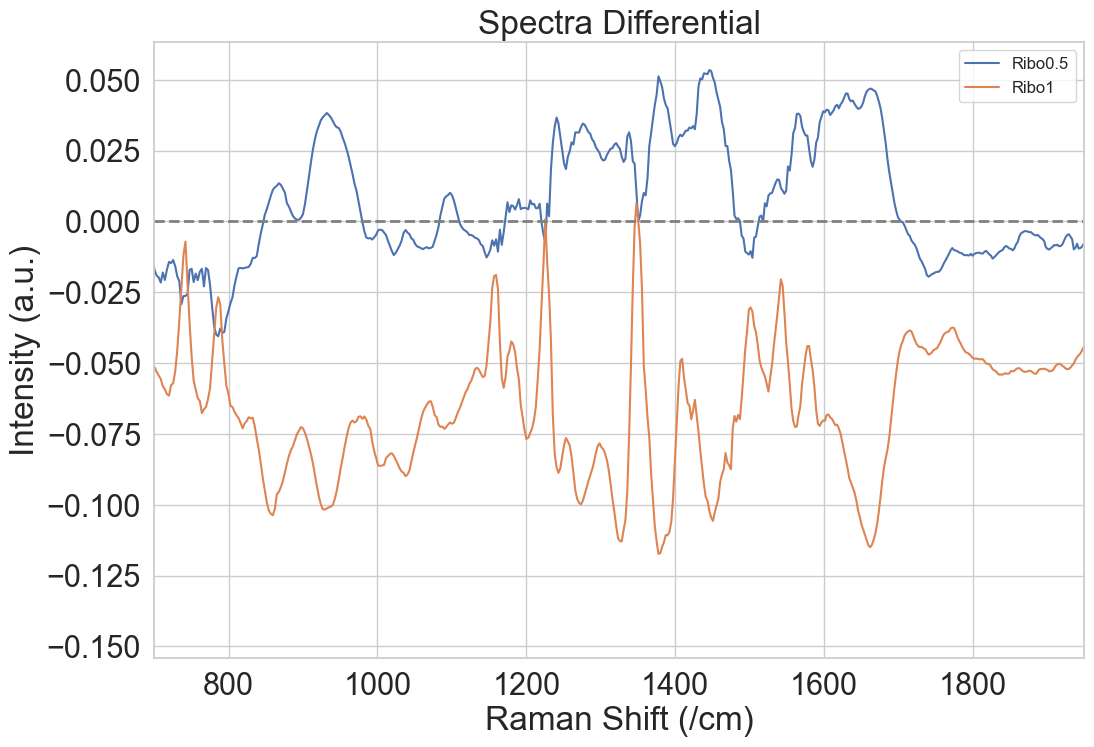

In [378]:
plt.figure(figsize = (12, 8))
sns.lineplot(
        data = drt,
        x = 'variable',
        y = 'value',
        hue = 'RiboConc',
        #hue_order=['pre','post1','post2', 'post3']
        #style='Trt'
        );
plt.title('Spectra Differential')
#plt.ylim(-.01, 1.1)
plt.xlim(700, 1950)
plt.ylabel('Intensity (a.u.)')
plt.xlabel('Raman Shift (/cm)')
plt.legend(fontsize = 12)
plt.axhline(0, ls = '--', color = 'gray', lw=2)

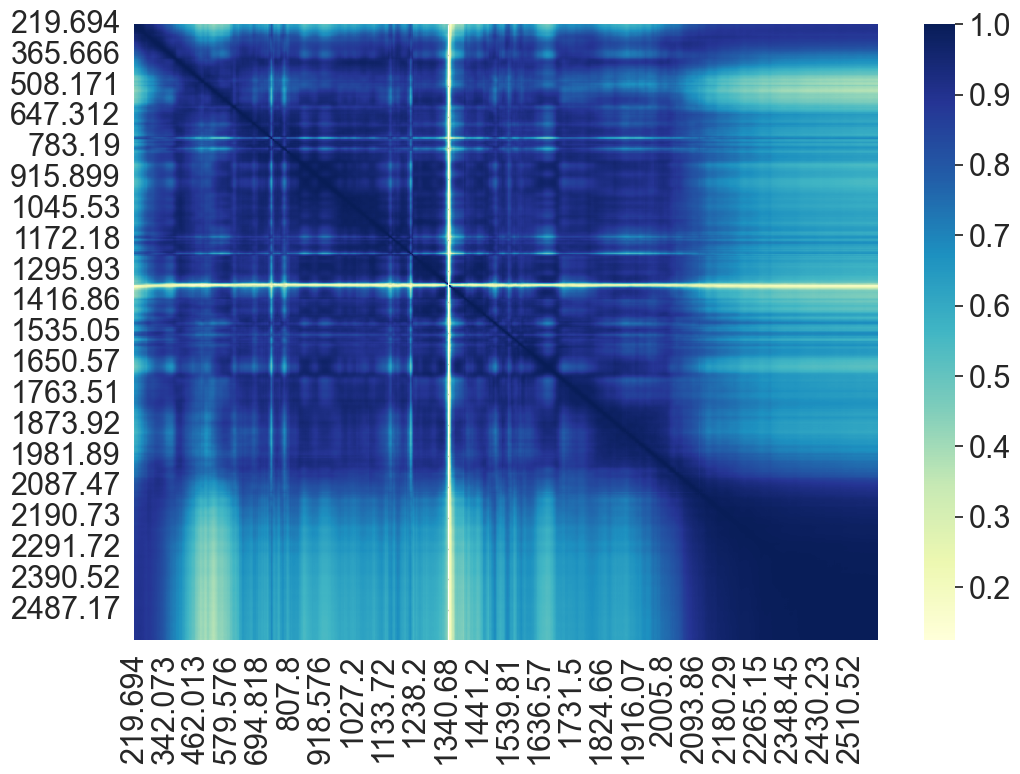

In [381]:
plt.figure(figsize = (12, 8))
sns.heatmap(dt_norm.corr(numeric_only=True),
             cmap='YlGnBu',
             #vmin=-1, vmax=1
             );

In [162]:
df_mag = dt.groupby('sample').mean().reset_index().melt(id_vars=['sample', 'spectra_num'])
df_mag[["variable", "value"]] = df_mag[["variable", "value"]].astype(float)

In [163]:
df_mag[df_mag['sample'] == 'Micetail_Ribo0.5_post']

sample  spectra_num  variable      value
0     Micetail_Ribo0.5_post          3.0   776.251 -35.687438
4     Micetail_Ribo0.5_post          3.0   777.424 -31.513148
8     Micetail_Ribo0.5_post          3.0   778.596 -35.736820
12    Micetail_Ribo0.5_post          3.0   779.769 -16.109186
16    Micetail_Ribo0.5_post          3.0   780.939   8.906660
...                     ...          ...       ...        ...
4076  Micetail_Ribo0.5_post          3.0  1877.880  12.054450
4080  Micetail_Ribo0.5_post          3.0  1878.870   9.352970
4084  Micetail_Ribo0.5_post          3.0  1879.870   7.459466
4088  Micetail_Ribo0.5_post          3.0  1880.860   6.406022
4092  Micetail_Ribo0.5_post          3.0  1881.860   6.057584

[1024 rows x 4 columns]

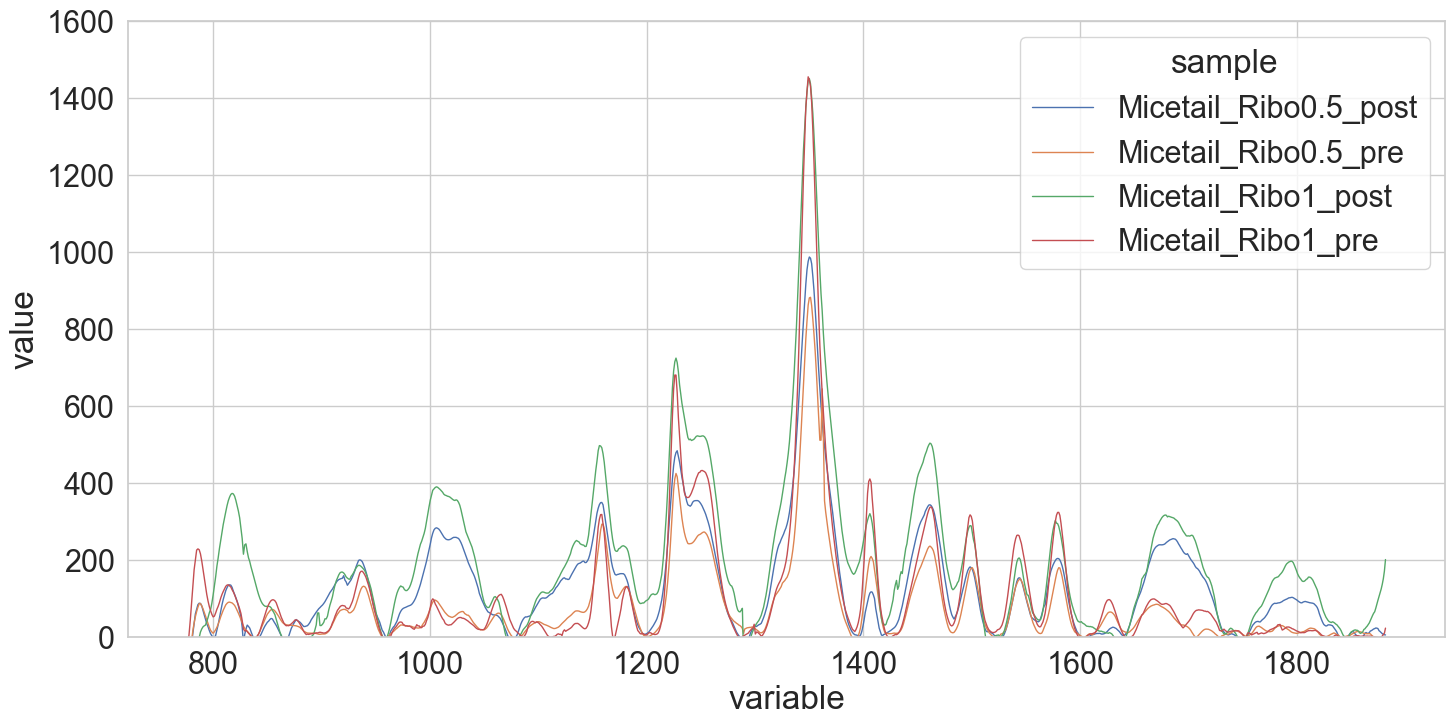

In [164]:
plt.figure(figsize = (17, 8))
sns.lineplot(
    data = df_mag,
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);

In [165]:
df_mag[df_mag['sample'].str.contains('pre')]

sample  spectra_num  variable      value
1     Micetail_Ribo0.5_pre          3.0   776.251 -90.164672
3       Micetail_Ribo1_pre          3.0   776.251 -19.945447
5     Micetail_Ribo0.5_pre          3.0   777.424 -63.314144
7       Micetail_Ribo1_pre          3.0   777.424   6.797188
9     Micetail_Ribo0.5_pre          3.0   778.596 -35.733060
...                    ...          ...       ...        ...
4087    Micetail_Ribo1_pre          3.0  1879.870   7.235869
4089  Micetail_Ribo0.5_pre          3.0  1880.860 -31.766186
4091    Micetail_Ribo1_pre          3.0  1880.860  10.562074
4093  Micetail_Ribo0.5_pre          3.0  1881.860 -36.633198
4095    Micetail_Ribo1_pre          3.0  1881.860  23.659338

[2048 rows x 4 columns]

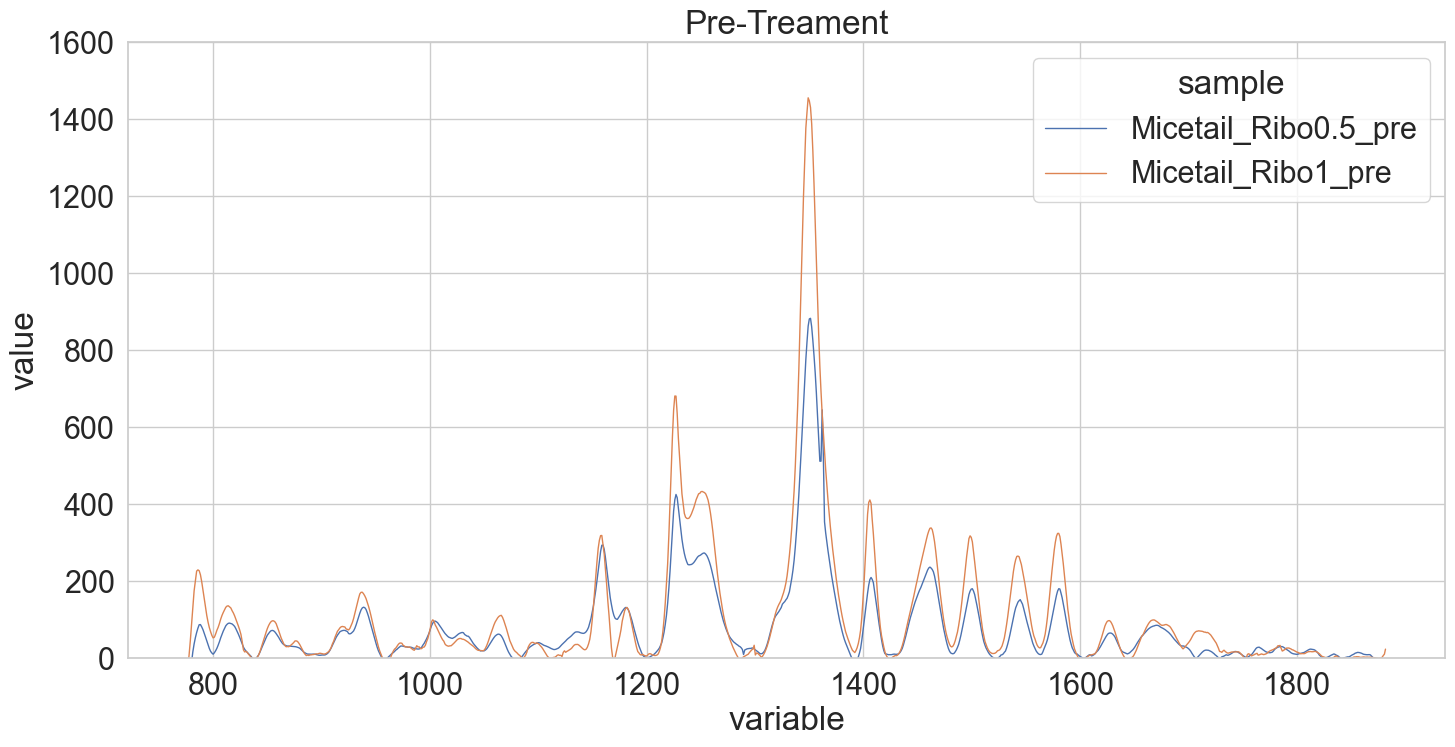

In [166]:
plt.figure(figsize = (17, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('pre')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

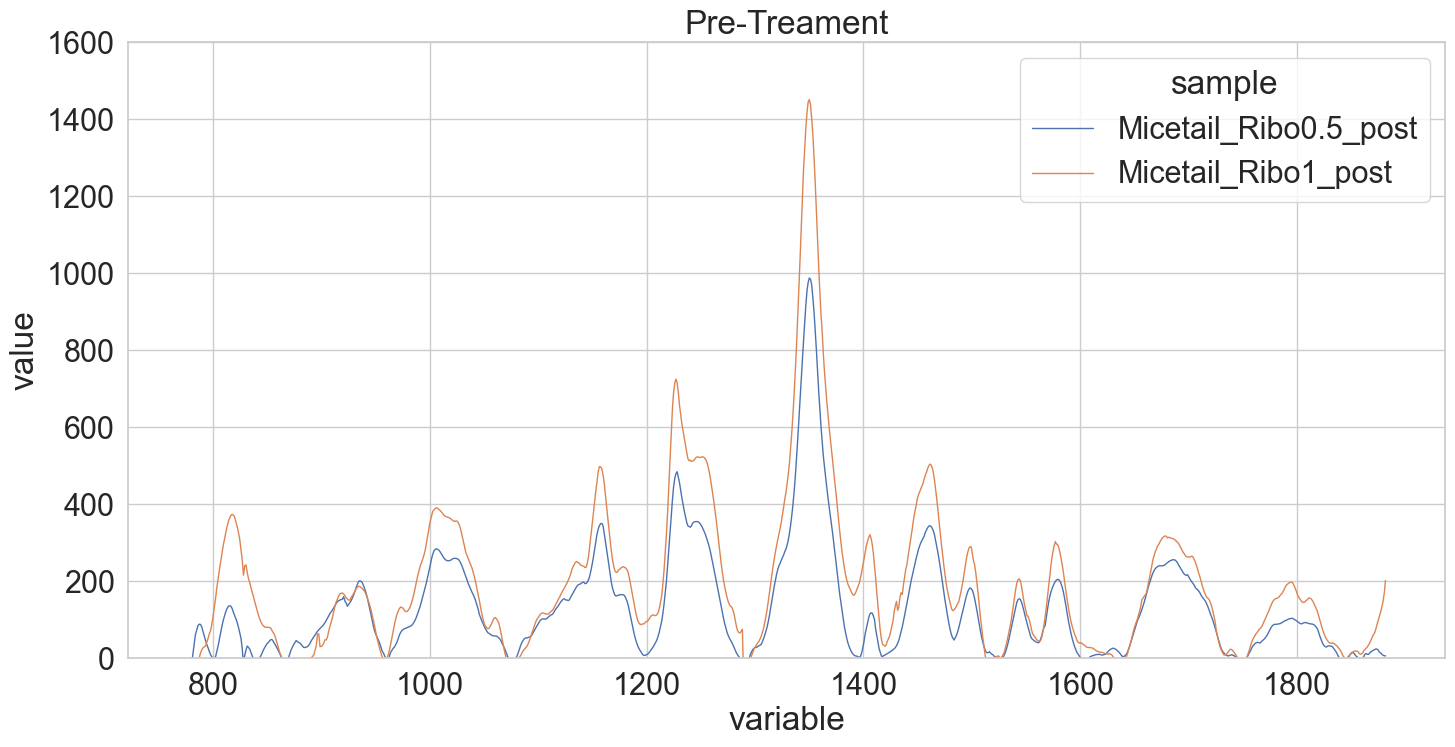

In [167]:
plt.figure(figsize = (17, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('post')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

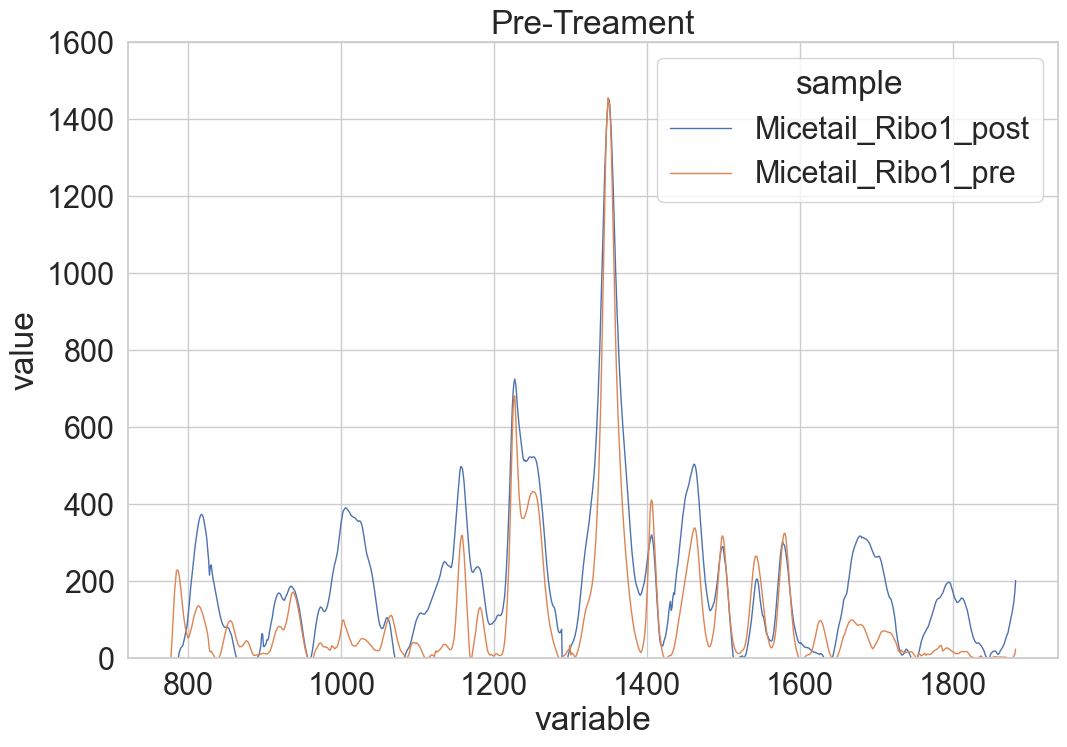

In [168]:
plt.figure(figsize = (12, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('Ribo1')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

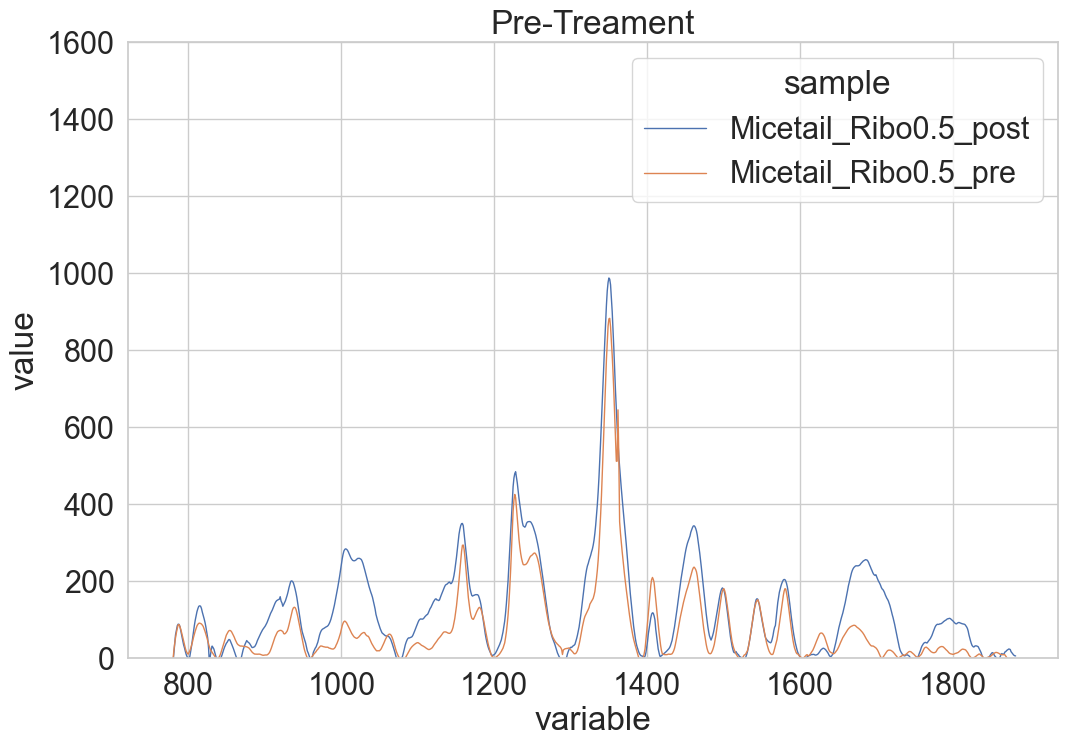

In [169]:
plt.figure(figsize = (12, 8))
sns.lineplot(
    data = df_mag[df_mag['sample'].str.contains('Ribo0.5')],
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 1,

    );
plt.ylim(0, 1600);
plt.title('Pre-Treament');

In [225]:
dtm = dt_norm.groupby(['sample']).mean().reset_index()
dtm

sample  spectra_num   776.251   777.424   778.596   779.769  \
0  Micetail_Ribo0.5_post         3.00 -0.034324 -0.031131 -0.035633 -0.016109   
1   Micetail_Ribo0.5_pre         3.00 -0.104190 -0.073590 -0.042074 -0.010500   
2    Micetail_Ribo1_post         2.75 -0.311310 -0.287669 -0.249781 -0.196015   
3     Micetail_Ribo1_pre         3.00 -0.008918  0.009264  0.035154  0.064712   

    780.939   782.111   783.283   784.455  ...   1872.89   1873.89   1874.89  \
0  0.009355  0.033810  0.062647  0.074306  ...  0.023956  0.023545  0.022389   
1  0.017917  0.041148  0.059775  0.075036  ... -0.006993 -0.009472 -0.012732   
2 -0.153095 -0.114427 -0.076990 -0.045150  ...  0.052423  0.060328  0.068227   
3  0.095543  0.124300  0.142170  0.159737  ...  0.000447  0.000179 -0.000013   

    1875.88   1876.88   1877.88   1878.87   1879.87   1880.86   1881.86  
0  0.017051  0.014773  0.012043  0.009328  0.007547  0.006585  0.006454  
1 -0.016297 -0.019122 -0.022716 -0.026824 -0.031097 -0.037068 -0.042781  
2  0.075509  0.082592  0.090911  0.100284  0.111598  0.126320  0.147335  
3 -0.000287  0.000113  0.000768  0.002075  0.005015  0.007192  0.015987  

[4 rows x 1026 columns]

In [226]:
spec_5 = (dtm[dtm['sample'].str.contains('0.5')].iloc[0, 2:]) - (dtm[dtm['sample'].str.contains('0.5')].iloc[1, 2:])

In [234]:
spec_1 = dtm[dtm['sample'].str.contains('1')].iloc[0, 2:] - (dtm[dtm['sample'].str.contains('1')].iloc[1, 2:])

In [235]:
dt_sub = pd.concat([pd.DataFrame(spec_5).T, pd.DataFrame(spec_1).T])#.insert(0, 'sample', ['Riboflavin_0.5', 'Riboflavin_1'])
dt_sub

776.251   777.424   778.596   779.769   780.939   782.111   783.283  \
0  0.069867  0.042459   0.00644 -0.005609 -0.008562 -0.007338  0.002872   
0 -0.302392 -0.296933 -0.284934 -0.260727 -0.248638 -0.238727  -0.21916   

    784.455   785.625   786.796  ...   1872.89   1873.89   1874.89   1875.88  \
0 -0.000731 -0.001304 -0.007458  ...   0.03095  0.033017  0.035121  0.033347   
0 -0.204887 -0.184925 -0.168324  ...  0.051976  0.060149  0.068241  0.075796   

    1876.88   1877.88   1878.87   1879.87   1880.86   1881.86  
0  0.033894  0.034759  0.036153  0.038644  0.043653  0.049236  
0  0.082479  0.090143  0.098209  0.106583  0.119128  0.131348  

[2 rows x 1024 columns]

In [236]:
dt_sub.insert(0, 'sample', ['Riboflavin_0.5', 'Riboflavin_1'])

In [237]:
dt_sub

sample   776.251   777.424   778.596   779.769   780.939   782.111  \
0  Riboflavin_0.5  0.069867  0.042459   0.00644 -0.005609 -0.008562 -0.007338   
0    Riboflavin_1 -0.302392 -0.296933 -0.284934 -0.260727 -0.248638 -0.238727   

    783.283   784.455   785.625  ...   1872.89   1873.89   1874.89   1875.88  \
0  0.002872 -0.000731 -0.001304  ...   0.03095  0.033017  0.035121  0.033347   
0  -0.21916 -0.204887 -0.184925  ...  0.051976  0.060149  0.068241  0.075796   

    1876.88   1877.88   1878.87   1879.87   1880.86   1881.86  
0  0.033894  0.034759  0.036153  0.038644  0.043653  0.049236  
0  0.082479  0.090143  0.098209  0.106583  0.119128  0.131348  

[2 rows x 1025 columns]

In [238]:
sub_m = dt_sub.melt(['sample'])
sub_m[['variable', 'value']] = sub_m[['variable', 'value']].astype(float)

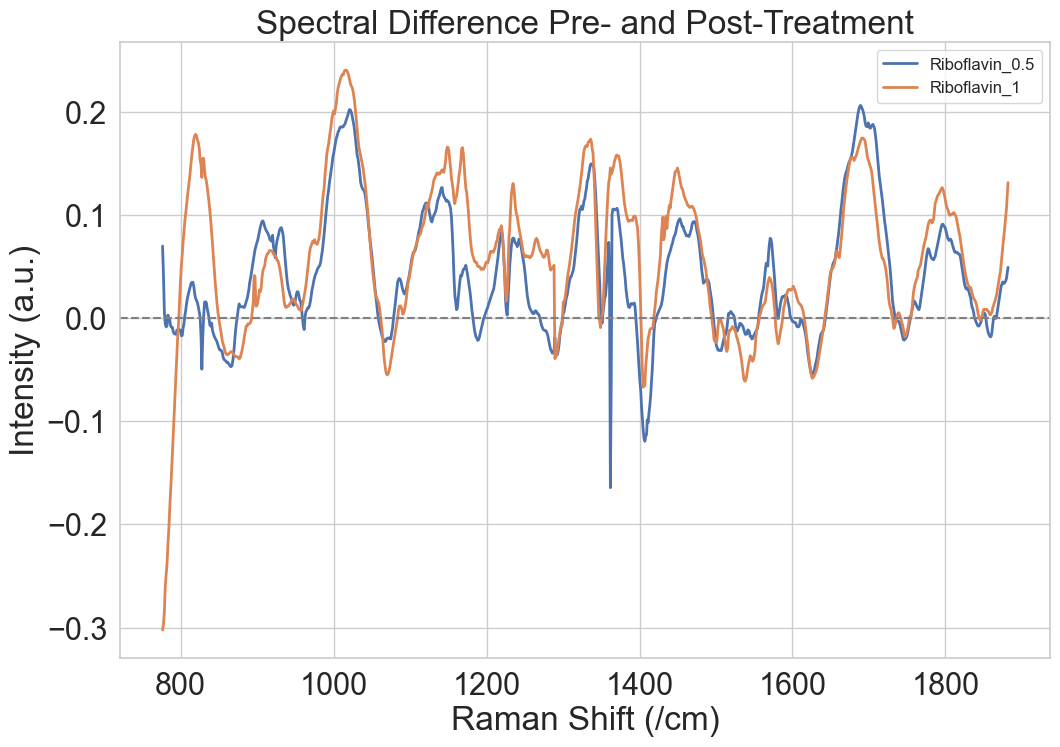

In [239]:
plt.figure(figsize = (12, 8))
sns.lineplot(
    data = sub_m,
    x = 'variable',
    y = 'value',
    hue = 'sample',
    lw = 2,

    );
plt.title('Spectral Difference Pre- and Post-Treatment')
plt.ylabel('Intensity (a.u.)')
plt.xlabel('Raman Shift (/cm)')
plt.legend(fontsize = 12)
plt.axhline(0, color = 'gray', ls = '--')